# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [5]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [6]:
Y = data['affair']

In [7]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [9]:
model.fit(X_train, Y_train)

LogisticRegression()

Получаем прогнозные значения модели (переменная predictions)

In [10]:
predictions = model.predict_proba(X_test)

In [11]:
# for line in zip( predictions[:, 1], Y_test ):
#     print( line )

In [12]:
model.score(X_test, Y_test)

0.7319371727748691

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [13]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


### Оценка качества модели

Считаем accuracy последней модели

In [14]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [15]:
for x in predictions[:, 0]: 
    if x < 0.5: 
        print(x)

0.2887237245198687
0.13144569277714535
0.499413860675922
0.36242780687401466
0.1663505938903843
0.4635368658473552
0.32796085529226193
0.16865480620869333
0.4052440106837215
0.4143171606529844
0.24369564614465467
0.45476583269001203
0.4827216641552756
0.20654016663919017
0.4391955642566966
0.0907885379893616
0.470646216852189
0.1257690988538398
0.270045940834188
0.13662056085276253
0.3743666055946978
0.18608226882446566
0.37350125698554015
0.3950085599808576
0.496087802479542
0.3634410955747809
0.23249367769150542
0.16262966729737793
0.22602049339627295
0.46218716860760856
0.21732814334340445
0.17756487637104024
0.49797002440386784
0.48038668589372713
0.419655057825008
0.49962861759558563
0.262191661201559
0.1442361238489076
0.3231508725121307
0.4605416980955951
0.329301311464554
0.43032406777965326
0.47496709038053997
0.24155897956121508
0.2506786058258238
0.2185222670148418
0.40644683604538
0.11291867014546764
0.29284382439494017
0.34085025154040727
0.37871565193512124
0.142037881525

In [16]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7204188481675393

In [17]:
precision = tp / (tp + fp)
precision

0.5681233933161953

### Используем готовые библиотеки

In [18]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [19]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [20]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.307813319349764, 1.0, 0.048952983887575935)
(0.3074501573976915, 0.9982964224872232, 0.05209819330650033)
(0.30761154855643047, 0.9982964224872232, 0.05253954681521709)
(0.3077731092436975, 0.9982964224872232, 0.052909515713353464)
(0.30793483972674723, 0.9982964224872232, 0.053728565973712436)
(0.30809674027339645, 0.9982964224872232, 0.05418294180295906)
(0.30825881115202525, 0.9982964224872232, 0.054563816586932594)
(0.30842105263157893, 0.9982964224872232, 0.054741308910460286)
(0.30858346498156924, 0.9982964224872232, 0.055453396224127656)
(0.3087460484720759, 0.9982964224872232, 0.05780133973421305)
(0.30890880337374804, 0.9982964224872232, 0.05932823568271177)
(0.3090717299578059, 0.9982964224872232, 0.059365536314583946)
(0.3092348284960422, 0.9982964224872232, 0.061822305705162894)
(0.3093980992608237, 0.9982964224872232, 0.062105307592902635)
(0.30956154252509244, 0.9982964224872232, 0.062440168260400476)
(0.3091966173361522, 0.9965928449744463, 0.06245992363324933)
(0.309

(0.4773022049286641, 0.626916524701874, 0.33318259930901123)
(0.4779220779220779, 0.626916524701874, 0.3335050541890647)
(0.47854356306892065, 0.626916524701874, 0.33369132626594256)
(0.47979139504563234, 0.626916524701874, 0.33425296984686603)
(0.4804177545691906, 0.626916524701874, 0.3342569874807002)
(0.48104575163398694, 0.626916524701874, 0.33426407271961905)
(0.4816753926701571, 0.626916524701874, 0.3345957204971815)
(0.48230668414154654, 0.626916524701874, 0.33516521532755955)
(0.4816272965879265, 0.6252129471890971, 0.3353799642343376)
(0.48226018396846254, 0.6252129471890971, 0.33593115788156874)
(0.48289473684210527, 0.6252129471890971, 0.33614918531430654)
(0.48353096179183136, 0.6252129471890971, 0.3374483556582889)
(0.4841688654353562, 0.6252129471890971, 0.3382860306742117)
(0.48348745046235136, 0.6235093696763203, 0.338360403680374)
(0.48412698412698413, 0.6235093696763203, 0.3387764291137627)
(0.48344370860927155, 0.6218057921635435, 0.33901660313223136)
(0.482758620689

In [21]:
from sklearn.metrics import average_precision_score

In [22]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5370782474582139

### ROC

In [23]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [24]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

# ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ ДЗ

In [25]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.944558911420308)
(0.0, 0.0017035775127768314, 0.9445589114203078)
(0.0, 0.017035775127768313, 0.8789939257006147)
(0.0007558578987150416, 0.017035775127768313, 0.8786478755171719)
(0.0007558578987150416, 0.028960817717206135, 0.8743556643003139)
(0.0022675736961451248, 0.028960817717206135, 0.8701673087202547)
(0.0022675736961451248, 0.034071550255536626, 0.8668201190288752)
(0.003779289493575208, 0.034071550255536626, 0.8579621184749097)
(0.003779289493575208, 0.03577512776831346, 0.8557638761510924)
(0.0045351473922902496, 0.03577512776831346, 0.8523294500483832)
(0.0045351473922902496, 0.03747870528109029, 0.8505415357994489)
(0.006046863189720333, 0.03747870528109029, 0.8373703327026221)
(0.006046863189720333, 0.049403747870528106, 0.8283556783016599)
(0.006802721088435374, 0.049403747870528106, 0.8272571005879265)
(0.006802721088435374, 0.05281090289608177, 0.8244237903168096)
(0.007558578987150416, 0.05281090289608177, 0.8228902787905844)
(0.007558578987150416, 0.054

(0.7770219198790628, 0.9420783645655877, 0.14555878110258744)
(0.7785336356764928, 0.9420783645655877, 0.14536760707131313)
(0.780801209372638, 0.9420783645655877, 0.1448133252377524)
(0.782312925170068, 0.9420783645655877, 0.14478112076590385)
(0.782312925170068, 0.9437819420783645, 0.14473247036851825)
(0.7838246409674982, 0.9437819420783645, 0.14435022358660793)
(0.7876039304610734, 0.9437819420783645, 0.1436187919111698)
(0.7891156462585034, 0.9437819420783645, 0.14357405868521095)
(0.7906273620559335, 0.9437819420783645, 0.14305951833086364)
(0.7921390778533636, 0.9437819420783645, 0.14268879189537645)
(0.7936507936507936, 0.9437819420783645, 0.1425038414112838)
(0.7936507936507936, 0.9454855195911414, 0.1423335388262015)
(0.8080120937263794, 0.9454855195911414, 0.13691303208092825)
(0.8080120937263794, 0.9471890971039182, 0.13632961495020673)
(0.8095238095238095, 0.9471890971039182, 0.13521220060354383)
(0.8110355253212396, 0.9471890971039182, 0.1348693363890743)
(0.8155706727135

In [26]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


In [27]:
tpr_dz_list = []
fpr_dz_list = []
for porog in range(0, 10001, 1):
    tp = 0
    fp = 0 
    fn = 0
    tn = 0
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):
        if predicted_prob >= porog / 10000 :
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    print(f'tp = {tp}, fp = {fp}, fn = {fn},tn = {tn}, при пороге = {porog / 10000}' )
    if tp + fn == 0:
        tpr_dz = 0 
    else:
        tpr_dz = tp / (tp + fn)
    tpr_dz_list.append(tpr_dz)
    if fp + tn == 0:
        fpr_dz = 0 
    else:
        fpr_dz = fp / (fp + tn)
    fpr_dz_list.append(fpr_dz)

tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0001
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0002
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0003
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0004
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0005
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0006
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0007
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0008
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0009
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.001
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0011
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0012
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0013
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0014
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0015
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0016
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0

tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.016
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0161
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0162
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0163
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0164
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0165
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0166
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0167
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0168
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0169
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.017
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0171
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0172
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0173
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0174
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0175
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0176
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0

tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0339
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.034
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0341
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0342
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0343
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0344
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0345
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0346
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0347
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0348
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0349
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.035
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0351
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0352
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0353
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0354
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0355
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0

tp = 587, fp = 1320, fn = 0,tn = 3, при пороге = 0.0488
tp = 587, fp = 1320, fn = 0,tn = 3, при пороге = 0.0489
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.049
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.0491
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.0492
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.0493
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.0494
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.0495
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.0496
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.0497
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.0498
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.0499
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.05
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.0501
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.0502
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.0503
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.0504
tp = 586, fp = 1320, fn = 1,tn = 3, при пороге = 0.

tp = 585, fp = 1302, fn = 2,tn = 21, при пороге = 0.0649
tp = 585, fp = 1302, fn = 2,tn = 21, при пороге = 0.065
tp = 585, fp = 1302, fn = 2,tn = 21, при пороге = 0.0651
tp = 585, fp = 1302, fn = 2,tn = 21, при пороге = 0.0652
tp = 585, fp = 1302, fn = 2,tn = 21, при пороге = 0.0653
tp = 585, fp = 1302, fn = 2,tn = 21, при пороге = 0.0654
tp = 585, fp = 1302, fn = 2,tn = 21, при пороге = 0.0655
tp = 585, fp = 1302, fn = 2,tn = 21, при пороге = 0.0656
tp = 585, fp = 1302, fn = 2,tn = 21, при пороге = 0.0657
tp = 585, fp = 1301, fn = 2,tn = 22, при пороге = 0.0658
tp = 585, fp = 1301, fn = 2,tn = 22, при пороге = 0.0659
tp = 585, fp = 1301, fn = 2,tn = 22, при пороге = 0.066
tp = 585, fp = 1301, fn = 2,tn = 22, при пороге = 0.0661
tp = 585, fp = 1301, fn = 2,tn = 22, при пороге = 0.0662
tp = 585, fp = 1301, fn = 2,tn = 22, при пороге = 0.0663
tp = 585, fp = 1301, fn = 2,tn = 22, при пороге = 0.0664
tp = 585, fp = 1301, fn = 2,tn = 22, при пороге = 0.0665
tp = 585, fp = 1301, fn = 2,tn = 

tp = 580, fp = 1270, fn = 7,tn = 53, при пороге = 0.0805
tp = 580, fp = 1270, fn = 7,tn = 53, при пороге = 0.0806
tp = 580, fp = 1269, fn = 7,tn = 54, при пороге = 0.0807
tp = 579, fp = 1269, fn = 8,tn = 54, при пороге = 0.0808
tp = 579, fp = 1269, fn = 8,tn = 54, при пороге = 0.0809
tp = 579, fp = 1269, fn = 8,tn = 54, при пороге = 0.081
tp = 579, fp = 1268, fn = 8,tn = 55, при пороге = 0.0811
tp = 579, fp = 1268, fn = 8,tn = 55, при пороге = 0.0812
tp = 579, fp = 1268, fn = 8,tn = 55, при пороге = 0.0813
tp = 579, fp = 1268, fn = 8,tn = 55, при пороге = 0.0814
tp = 579, fp = 1268, fn = 8,tn = 55, при пороге = 0.0815
tp = 579, fp = 1268, fn = 8,tn = 55, при пороге = 0.0816
tp = 579, fp = 1268, fn = 8,tn = 55, при пороге = 0.0817
tp = 579, fp = 1268, fn = 8,tn = 55, при пороге = 0.0818
tp = 579, fp = 1268, fn = 8,tn = 55, при пороге = 0.0819
tp = 579, fp = 1268, fn = 8,tn = 55, при пороге = 0.082
tp = 579, fp = 1268, fn = 8,tn = 55, при пороге = 0.0821
tp = 579, fp = 1268, fn = 8,tn = 

tp = 576, fp = 1215, fn = 11,tn = 108, при пороге = 0.0975
tp = 576, fp = 1215, fn = 11,tn = 108, при пороге = 0.0976
tp = 576, fp = 1215, fn = 11,tn = 108, при пороге = 0.0977
tp = 576, fp = 1215, fn = 11,tn = 108, при пороге = 0.0978
tp = 576, fp = 1215, fn = 11,tn = 108, при пороге = 0.0979
tp = 576, fp = 1215, fn = 11,tn = 108, при пороге = 0.098
tp = 576, fp = 1215, fn = 11,tn = 108, при пороге = 0.0981
tp = 576, fp = 1214, fn = 11,tn = 109, при пороге = 0.0982
tp = 576, fp = 1214, fn = 11,tn = 109, при пороге = 0.0983
tp = 576, fp = 1214, fn = 11,tn = 109, при пороге = 0.0984
tp = 576, fp = 1213, fn = 11,tn = 110, при пороге = 0.0985
tp = 576, fp = 1210, fn = 11,tn = 113, при пороге = 0.0986
tp = 576, fp = 1210, fn = 11,tn = 113, при пороге = 0.0987
tp = 576, fp = 1209, fn = 11,tn = 114, при пороге = 0.0988
tp = 576, fp = 1207, fn = 11,tn = 116, при пороге = 0.0989
tp = 576, fp = 1207, fn = 11,tn = 116, при пороге = 0.099
tp = 576, fp = 1207, fn = 11,tn = 116, при пороге = 0.0991

tp = 571, fp = 1172, fn = 16,tn = 151, при пороге = 0.1115
tp = 571, fp = 1172, fn = 16,tn = 151, при пороге = 0.1116
tp = 571, fp = 1172, fn = 16,tn = 151, при пороге = 0.1117
tp = 571, fp = 1171, fn = 16,tn = 152, при пороге = 0.1118
tp = 571, fp = 1171, fn = 16,tn = 152, при пороге = 0.1119
tp = 571, fp = 1171, fn = 16,tn = 152, при пороге = 0.112
tp = 568, fp = 1167, fn = 19,tn = 156, при пороге = 0.1121
tp = 568, fp = 1167, fn = 19,tn = 156, при пороге = 0.1122
tp = 568, fp = 1167, fn = 19,tn = 156, при пороге = 0.1123
tp = 568, fp = 1166, fn = 19,tn = 157, при пороге = 0.1124
tp = 568, fp = 1166, fn = 19,tn = 157, при пороге = 0.1125
tp = 568, fp = 1166, fn = 19,tn = 157, при пороге = 0.1126
tp = 568, fp = 1166, fn = 19,tn = 157, при пороге = 0.1127
tp = 568, fp = 1166, fn = 19,tn = 157, при пороге = 0.1128
tp = 568, fp = 1165, fn = 19,tn = 158, при пороге = 0.1129
tp = 568, fp = 1165, fn = 19,tn = 158, при пороге = 0.113
tp = 568, fp = 1165, fn = 19,tn = 158, при пороге = 0.1131

tp = 559, fp = 1111, fn = 28,tn = 212, при пороге = 0.1258
tp = 558, fp = 1111, fn = 29,tn = 212, при пороге = 0.1259
tp = 558, fp = 1111, fn = 29,tn = 212, при пороге = 0.126
tp = 558, fp = 1111, fn = 29,tn = 212, при пороге = 0.1261
tp = 558, fp = 1111, fn = 29,tn = 212, при пороге = 0.1262
tp = 558, fp = 1110, fn = 29,tn = 213, при пороге = 0.1263
tp = 558, fp = 1108, fn = 29,tn = 215, при пороге = 0.1264
tp = 558, fp = 1108, fn = 29,tn = 215, при пороге = 0.1265
tp = 558, fp = 1108, fn = 29,tn = 215, при пороге = 0.1266
tp = 558, fp = 1108, fn = 29,tn = 215, при пороге = 0.1267
tp = 558, fp = 1107, fn = 29,tn = 216, при пороге = 0.1268
tp = 558, fp = 1106, fn = 29,tn = 217, при пороге = 0.1269
tp = 558, fp = 1106, fn = 29,tn = 217, при пороге = 0.127
tp = 558, fp = 1104, fn = 29,tn = 219, при пороге = 0.1271
tp = 558, fp = 1099, fn = 29,tn = 224, при пороге = 0.1272
tp = 558, fp = 1098, fn = 29,tn = 225, при пороге = 0.1273
tp = 558, fp = 1098, fn = 29,tn = 225, при пороге = 0.1274

tp = 555, fp = 1050, fn = 32,tn = 273, при пороге = 0.1418
tp = 555, fp = 1050, fn = 32,tn = 273, при пороге = 0.1419
tp = 555, fp = 1050, fn = 32,tn = 273, при пороге = 0.142
tp = 555, fp = 1050, fn = 32,tn = 273, при пороге = 0.1421
tp = 555, fp = 1050, fn = 32,tn = 273, при пороге = 0.1422
tp = 555, fp = 1050, fn = 32,tn = 273, при пороге = 0.1423
tp = 554, fp = 1050, fn = 33,tn = 273, при пороге = 0.1424
tp = 554, fp = 1050, fn = 33,tn = 273, при пороге = 0.1425
tp = 554, fp = 1048, fn = 33,tn = 275, при пороге = 0.1426
tp = 554, fp = 1046, fn = 33,tn = 277, при пороге = 0.1427
tp = 554, fp = 1046, fn = 33,tn = 277, при пороге = 0.1428
tp = 554, fp = 1046, fn = 33,tn = 277, при пороге = 0.1429
tp = 554, fp = 1046, fn = 33,tn = 277, при пороге = 0.143
tp = 554, fp = 1045, fn = 33,tn = 278, при пороге = 0.1431
tp = 554, fp = 1045, fn = 33,tn = 278, при пороге = 0.1432
tp = 554, fp = 1044, fn = 33,tn = 279, при пороге = 0.1433
tp = 554, fp = 1044, fn = 33,tn = 279, при пороге = 0.1434

tp = 541, fp = 984, fn = 46,tn = 339, при пороге = 0.1577
tp = 541, fp = 984, fn = 46,tn = 339, при пороге = 0.1578
tp = 541, fp = 984, fn = 46,tn = 339, при пороге = 0.1579
tp = 541, fp = 984, fn = 46,tn = 339, при пороге = 0.158
tp = 541, fp = 984, fn = 46,tn = 339, при пороге = 0.1581
tp = 541, fp = 984, fn = 46,tn = 339, при пороге = 0.1582
tp = 541, fp = 983, fn = 46,tn = 340, при пороге = 0.1583
tp = 541, fp = 982, fn = 46,tn = 341, при пороге = 0.1584
tp = 541, fp = 982, fn = 46,tn = 341, при пороге = 0.1585
tp = 541, fp = 981, fn = 46,tn = 342, при пороге = 0.1586
tp = 541, fp = 981, fn = 46,tn = 342, при пороге = 0.1587
tp = 541, fp = 981, fn = 46,tn = 342, при пороге = 0.1588
tp = 541, fp = 981, fn = 46,tn = 342, при пороге = 0.1589
tp = 541, fp = 980, fn = 46,tn = 343, при пороге = 0.159
tp = 541, fp = 980, fn = 46,tn = 343, при пороге = 0.1591
tp = 541, fp = 980, fn = 46,tn = 343, при пороге = 0.1592
tp = 541, fp = 980, fn = 46,tn = 343, при пороге = 0.1593
tp = 541, fp = 9

tp = 530, fp = 920, fn = 57,tn = 403, при пороге = 0.1727
tp = 530, fp = 920, fn = 57,tn = 403, при пороге = 0.1728
tp = 530, fp = 920, fn = 57,tn = 403, при пороге = 0.1729
tp = 530, fp = 918, fn = 57,tn = 405, при пороге = 0.173
tp = 530, fp = 918, fn = 57,tn = 405, при пороге = 0.1731
tp = 529, fp = 917, fn = 58,tn = 406, при пороге = 0.1732
tp = 529, fp = 916, fn = 58,tn = 407, при пороге = 0.1733
tp = 529, fp = 916, fn = 58,tn = 407, при пороге = 0.1734
tp = 529, fp = 916, fn = 58,tn = 407, при пороге = 0.1735
tp = 529, fp = 916, fn = 58,tn = 407, при пороге = 0.1736
tp = 529, fp = 916, fn = 58,tn = 407, при пороге = 0.1737
tp = 529, fp = 916, fn = 58,tn = 407, при пороге = 0.1738
tp = 529, fp = 916, fn = 58,tn = 407, при пороге = 0.1739
tp = 529, fp = 916, fn = 58,tn = 407, при пороге = 0.174
tp = 529, fp = 915, fn = 58,tn = 408, при пороге = 0.1741
tp = 529, fp = 915, fn = 58,tn = 408, при пороге = 0.1742
tp = 529, fp = 915, fn = 58,tn = 408, при пороге = 0.1743
tp = 529, fp = 9

tp = 519, fp = 855, fn = 68,tn = 468, при пороге = 0.1874
tp = 518, fp = 855, fn = 69,tn = 468, при пороге = 0.1875
tp = 518, fp = 854, fn = 69,tn = 469, при пороге = 0.1876
tp = 518, fp = 853, fn = 69,tn = 470, при пороге = 0.1877
tp = 518, fp = 853, fn = 69,tn = 470, при пороге = 0.1878
tp = 518, fp = 852, fn = 69,tn = 471, при пороге = 0.1879
tp = 518, fp = 852, fn = 69,tn = 471, при пороге = 0.188
tp = 518, fp = 852, fn = 69,tn = 471, при пороге = 0.1881
tp = 518, fp = 852, fn = 69,tn = 471, при пороге = 0.1882
tp = 518, fp = 851, fn = 69,tn = 472, при пороге = 0.1883
tp = 518, fp = 849, fn = 69,tn = 474, при пороге = 0.1884
tp = 518, fp = 848, fn = 69,tn = 475, при пороге = 0.1885
tp = 518, fp = 848, fn = 69,tn = 475, при пороге = 0.1886
tp = 518, fp = 848, fn = 69,tn = 475, при пороге = 0.1887
tp = 518, fp = 848, fn = 69,tn = 475, при пороге = 0.1888
tp = 518, fp = 848, fn = 69,tn = 475, при пороге = 0.1889
tp = 518, fp = 848, fn = 69,tn = 475, при пороге = 0.189
tp = 518, fp = 8

tp = 505, fp = 802, fn = 82,tn = 521, при пороге = 0.2033
tp = 505, fp = 802, fn = 82,tn = 521, при пороге = 0.2034
tp = 505, fp = 802, fn = 82,tn = 521, при пороге = 0.2035
tp = 505, fp = 802, fn = 82,tn = 521, при пороге = 0.2036
tp = 505, fp = 802, fn = 82,tn = 521, при пороге = 0.2037
tp = 505, fp = 802, fn = 82,tn = 521, при пороге = 0.2038
tp = 505, fp = 802, fn = 82,tn = 521, при пороге = 0.2039
tp = 505, fp = 802, fn = 82,tn = 521, при пороге = 0.204
tp = 505, fp = 801, fn = 82,tn = 522, при пороге = 0.2041
tp = 505, fp = 801, fn = 82,tn = 522, при пороге = 0.2042
tp = 505, fp = 800, fn = 82,tn = 523, при пороге = 0.2043
tp = 505, fp = 800, fn = 82,tn = 523, при пороге = 0.2044
tp = 505, fp = 800, fn = 82,tn = 523, при пороге = 0.2045
tp = 505, fp = 800, fn = 82,tn = 523, при пороге = 0.2046
tp = 505, fp = 800, fn = 82,tn = 523, при пороге = 0.2047
tp = 505, fp = 800, fn = 82,tn = 523, при пороге = 0.2048
tp = 505, fp = 800, fn = 82,tn = 523, при пороге = 0.2049
tp = 505, fp = 

tp = 490, fp = 738, fn = 97,tn = 585, при пороге = 0.2192
tp = 490, fp = 738, fn = 97,tn = 585, при пороге = 0.2193
tp = 489, fp = 737, fn = 98,tn = 586, при пороге = 0.2194
tp = 489, fp = 737, fn = 98,tn = 586, при пороге = 0.2195
tp = 489, fp = 737, fn = 98,tn = 586, при пороге = 0.2196
tp = 489, fp = 737, fn = 98,tn = 586, при пороге = 0.2197
tp = 488, fp = 737, fn = 99,tn = 586, при пороге = 0.2198
tp = 488, fp = 737, fn = 99,tn = 586, при пороге = 0.2199
tp = 488, fp = 737, fn = 99,tn = 586, при пороге = 0.22
tp = 488, fp = 736, fn = 99,tn = 587, при пороге = 0.2201
tp = 488, fp = 736, fn = 99,tn = 587, при пороге = 0.2202
tp = 488, fp = 734, fn = 99,tn = 589, при пороге = 0.2203
tp = 488, fp = 733, fn = 99,tn = 590, при пороге = 0.2204
tp = 488, fp = 733, fn = 99,tn = 590, при пороге = 0.2205
tp = 488, fp = 733, fn = 99,tn = 590, при пороге = 0.2206
tp = 488, fp = 732, fn = 99,tn = 591, при пороге = 0.2207
tp = 488, fp = 732, fn = 99,tn = 591, при пороге = 0.2208
tp = 488, fp = 7

tp = 481, fp = 683, fn = 106,tn = 640, при пороге = 0.2342
tp = 481, fp = 683, fn = 106,tn = 640, при пороге = 0.2343
tp = 481, fp = 683, fn = 106,tn = 640, при пороге = 0.2344
tp = 481, fp = 683, fn = 106,tn = 640, при пороге = 0.2345
tp = 481, fp = 683, fn = 106,tn = 640, при пороге = 0.2346
tp = 481, fp = 680, fn = 106,tn = 643, при пороге = 0.2347
tp = 481, fp = 680, fn = 106,tn = 643, при пороге = 0.2348
tp = 481, fp = 680, fn = 106,tn = 643, при пороге = 0.2349
tp = 481, fp = 680, fn = 106,tn = 643, при пороге = 0.235
tp = 481, fp = 678, fn = 106,tn = 645, при пороге = 0.2351
tp = 481, fp = 678, fn = 106,tn = 645, при пороге = 0.2352
tp = 481, fp = 677, fn = 106,tn = 646, при пороге = 0.2353
tp = 481, fp = 677, fn = 106,tn = 646, при пороге = 0.2354
tp = 481, fp = 676, fn = 106,tn = 647, при пороге = 0.2355
tp = 481, fp = 676, fn = 106,tn = 647, при пороге = 0.2356
tp = 481, fp = 676, fn = 106,tn = 647, при пороге = 0.2357
tp = 481, fp = 676, fn = 106,tn = 647, при пороге = 0.235

tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.2499
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.25
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.2501
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.2502
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.2503
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.2504
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.2505
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.2506
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.2507
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.2508
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.2509
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.251
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.2511
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.2512
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.2513
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.2514
tp = 465, fp = 633, fn = 122,tn = 690, при пороге = 0.2515


tp = 453, fp = 583, fn = 134,tn = 740, при пороге = 0.2648
tp = 453, fp = 583, fn = 134,tn = 740, при пороге = 0.2649
tp = 453, fp = 583, fn = 134,tn = 740, при пороге = 0.265
tp = 453, fp = 582, fn = 134,tn = 741, при пороге = 0.2651
tp = 453, fp = 582, fn = 134,tn = 741, при пороге = 0.2652
tp = 452, fp = 580, fn = 135,tn = 743, при пороге = 0.2653
tp = 452, fp = 580, fn = 135,tn = 743, при пороге = 0.2654
tp = 452, fp = 580, fn = 135,tn = 743, при пороге = 0.2655
tp = 452, fp = 580, fn = 135,tn = 743, при пороге = 0.2656
tp = 452, fp = 579, fn = 135,tn = 744, при пороге = 0.2657
tp = 452, fp = 579, fn = 135,tn = 744, при пороге = 0.2658
tp = 452, fp = 578, fn = 135,tn = 745, при пороге = 0.2659
tp = 452, fp = 578, fn = 135,tn = 745, при пороге = 0.266
tp = 452, fp = 578, fn = 135,tn = 745, при пороге = 0.2661
tp = 452, fp = 578, fn = 135,tn = 745, при пороге = 0.2662
tp = 452, fp = 577, fn = 135,tn = 746, при пороге = 0.2663
tp = 452, fp = 577, fn = 135,tn = 746, при пороге = 0.2664

tp = 432, fp = 534, fn = 155,tn = 789, при пороге = 0.2794
tp = 432, fp = 534, fn = 155,tn = 789, при пороге = 0.2795
tp = 432, fp = 534, fn = 155,tn = 789, при пороге = 0.2796
tp = 432, fp = 533, fn = 155,tn = 790, при пороге = 0.2797
tp = 432, fp = 533, fn = 155,tn = 790, при пороге = 0.2798
tp = 432, fp = 533, fn = 155,tn = 790, при пороге = 0.2799
tp = 432, fp = 533, fn = 155,tn = 790, при пороге = 0.28
tp = 432, fp = 533, fn = 155,tn = 790, при пороге = 0.2801
tp = 432, fp = 533, fn = 155,tn = 790, при пороге = 0.2802
tp = 432, fp = 533, fn = 155,tn = 790, при пороге = 0.2803
tp = 432, fp = 531, fn = 155,tn = 792, при пороге = 0.2804
tp = 432, fp = 530, fn = 155,tn = 793, при пороге = 0.2805
tp = 432, fp = 530, fn = 155,tn = 793, при пороге = 0.2806
tp = 431, fp = 530, fn = 156,tn = 793, при пороге = 0.2807
tp = 431, fp = 530, fn = 156,tn = 793, при пороге = 0.2808
tp = 431, fp = 529, fn = 156,tn = 794, при пороге = 0.2809
tp = 431, fp = 529, fn = 156,tn = 794, при пороге = 0.281


tp = 415, fp = 487, fn = 172,tn = 836, при пороге = 0.294
tp = 415, fp = 487, fn = 172,tn = 836, при пороге = 0.2941
tp = 414, fp = 487, fn = 173,tn = 836, при пороге = 0.2942
tp = 414, fp = 487, fn = 173,tn = 836, при пороге = 0.2943
tp = 414, fp = 487, fn = 173,tn = 836, при пороге = 0.2944
tp = 414, fp = 487, fn = 173,tn = 836, при пороге = 0.2945
tp = 414, fp = 487, fn = 173,tn = 836, при пороге = 0.2946
tp = 414, fp = 487, fn = 173,tn = 836, при пороге = 0.2947
tp = 414, fp = 487, fn = 173,tn = 836, при пороге = 0.2948
tp = 414, fp = 487, fn = 173,tn = 836, при пороге = 0.2949
tp = 414, fp = 487, fn = 173,tn = 836, при пороге = 0.295
tp = 414, fp = 487, fn = 173,tn = 836, при пороге = 0.2951
tp = 414, fp = 487, fn = 173,tn = 836, при пороге = 0.2952
tp = 414, fp = 486, fn = 173,tn = 837, при пороге = 0.2953
tp = 414, fp = 485, fn = 173,tn = 838, при пороге = 0.2954
tp = 414, fp = 485, fn = 173,tn = 838, при пороге = 0.2955
tp = 414, fp = 485, fn = 173,tn = 838, при пороге = 0.2956

tp = 400, fp = 455, fn = 187,tn = 868, при пороге = 0.3081
tp = 400, fp = 455, fn = 187,tn = 868, при пороге = 0.3082
tp = 400, fp = 455, fn = 187,tn = 868, при пороге = 0.3083
tp = 400, fp = 455, fn = 187,tn = 868, при пороге = 0.3084
tp = 400, fp = 454, fn = 187,tn = 869, при пороге = 0.3085
tp = 400, fp = 454, fn = 187,tn = 869, при пороге = 0.3086
tp = 400, fp = 454, fn = 187,tn = 869, при пороге = 0.3087
tp = 400, fp = 454, fn = 187,tn = 869, при пороге = 0.3088
tp = 400, fp = 454, fn = 187,tn = 869, при пороге = 0.3089
tp = 399, fp = 454, fn = 188,tn = 869, при пороге = 0.309
tp = 399, fp = 454, fn = 188,tn = 869, при пороге = 0.3091
tp = 399, fp = 452, fn = 188,tn = 871, при пороге = 0.3092
tp = 399, fp = 452, fn = 188,tn = 871, при пороге = 0.3093
tp = 399, fp = 452, fn = 188,tn = 871, при пороге = 0.3094
tp = 399, fp = 452, fn = 188,tn = 871, при пороге = 0.3095
tp = 399, fp = 450, fn = 188,tn = 873, при пороге = 0.3096
tp = 399, fp = 450, fn = 188,tn = 873, при пороге = 0.309

tp = 378, fp = 418, fn = 209,tn = 905, при пороге = 0.3225
tp = 378, fp = 418, fn = 209,tn = 905, при пороге = 0.3226
tp = 378, fp = 418, fn = 209,tn = 905, при пороге = 0.3227
tp = 378, fp = 418, fn = 209,tn = 905, при пороге = 0.3228
tp = 378, fp = 418, fn = 209,tn = 905, при пороге = 0.3229
tp = 378, fp = 418, fn = 209,tn = 905, при пороге = 0.323
tp = 378, fp = 418, fn = 209,tn = 905, при пороге = 0.3231
tp = 378, fp = 418, fn = 209,tn = 905, при пороге = 0.3232
tp = 377, fp = 418, fn = 210,tn = 905, при пороге = 0.3233
tp = 377, fp = 418, fn = 210,tn = 905, при пороге = 0.3234
tp = 377, fp = 418, fn = 210,tn = 905, при пороге = 0.3235
tp = 377, fp = 418, fn = 210,tn = 905, при пороге = 0.3236
tp = 377, fp = 418, fn = 210,tn = 905, при пороге = 0.3237
tp = 377, fp = 418, fn = 210,tn = 905, при пороге = 0.3238
tp = 377, fp = 418, fn = 210,tn = 905, при пороге = 0.3239
tp = 377, fp = 418, fn = 210,tn = 905, при пороге = 0.324
tp = 377, fp = 418, fn = 210,tn = 905, при пороге = 0.3241

tp = 366, fp = 390, fn = 221,tn = 933, при пороге = 0.3385
tp = 366, fp = 390, fn = 221,tn = 933, при пороге = 0.3386
tp = 366, fp = 390, fn = 221,tn = 933, при пороге = 0.3387
tp = 365, fp = 390, fn = 222,tn = 933, при пороге = 0.3388
tp = 365, fp = 390, fn = 222,tn = 933, при пороге = 0.3389
tp = 365, fp = 390, fn = 222,tn = 933, при пороге = 0.339
tp = 364, fp = 390, fn = 223,tn = 933, при пороге = 0.3391
tp = 364, fp = 390, fn = 223,tn = 933, при пороге = 0.3392
tp = 364, fp = 390, fn = 223,tn = 933, при пороге = 0.3393
tp = 364, fp = 390, fn = 223,tn = 933, при пороге = 0.3394
tp = 364, fp = 390, fn = 223,tn = 933, при пороге = 0.3395
tp = 364, fp = 390, fn = 223,tn = 933, при пороге = 0.3396
tp = 364, fp = 390, fn = 223,tn = 933, при пороге = 0.3397
tp = 364, fp = 390, fn = 223,tn = 933, при пороге = 0.3398
tp = 363, fp = 390, fn = 224,tn = 933, при пороге = 0.3399
tp = 362, fp = 390, fn = 225,tn = 933, при пороге = 0.34
tp = 362, fp = 390, fn = 225,tn = 933, при пороге = 0.3401


tp = 351, fp = 359, fn = 236,tn = 964, при пороге = 0.3526
tp = 350, fp = 359, fn = 237,tn = 964, при пороге = 0.3527
tp = 350, fp = 359, fn = 237,tn = 964, при пороге = 0.3528
tp = 350, fp = 359, fn = 237,tn = 964, при пороге = 0.3529
tp = 350, fp = 358, fn = 237,tn = 965, при пороге = 0.353
tp = 350, fp = 358, fn = 237,tn = 965, при пороге = 0.3531
tp = 350, fp = 358, fn = 237,tn = 965, при пороге = 0.3532
tp = 350, fp = 358, fn = 237,tn = 965, при пороге = 0.3533
tp = 350, fp = 358, fn = 237,tn = 965, при пороге = 0.3534
tp = 350, fp = 358, fn = 237,tn = 965, при пороге = 0.3535
tp = 350, fp = 358, fn = 237,tn = 965, при пороге = 0.3536
tp = 349, fp = 358, fn = 238,tn = 965, при пороге = 0.3537
tp = 349, fp = 358, fn = 238,tn = 965, при пороге = 0.3538
tp = 349, fp = 357, fn = 238,tn = 966, при пороге = 0.3539
tp = 349, fp = 357, fn = 238,tn = 966, при пороге = 0.354
tp = 349, fp = 357, fn = 238,tn = 966, при пороге = 0.3541
tp = 348, fp = 356, fn = 239,tn = 967, при пороге = 0.3542

tp = 333, fp = 324, fn = 254,tn = 999, при пороге = 0.3687
tp = 333, fp = 324, fn = 254,tn = 999, при пороге = 0.3688
tp = 333, fp = 324, fn = 254,tn = 999, при пороге = 0.3689
tp = 332, fp = 324, fn = 255,tn = 999, при пороге = 0.369
tp = 332, fp = 323, fn = 255,tn = 1000, при пороге = 0.3691
tp = 332, fp = 323, fn = 255,tn = 1000, при пороге = 0.3692
tp = 332, fp = 323, fn = 255,tn = 1000, при пороге = 0.3693
tp = 332, fp = 322, fn = 255,tn = 1001, при пороге = 0.3694
tp = 332, fp = 322, fn = 255,tn = 1001, при пороге = 0.3695
tp = 332, fp = 322, fn = 255,tn = 1001, при пороге = 0.3696
tp = 332, fp = 322, fn = 255,tn = 1001, при пороге = 0.3697
tp = 332, fp = 322, fn = 255,tn = 1001, при пороге = 0.3698
tp = 332, fp = 322, fn = 255,tn = 1001, при пороге = 0.3699
tp = 332, fp = 322, fn = 255,tn = 1001, при пороге = 0.37
tp = 332, fp = 322, fn = 255,tn = 1001, при пороге = 0.3701
tp = 332, fp = 322, fn = 255,tn = 1001, при пороге = 0.3702
tp = 332, fp = 322, fn = 255,tn = 1001, при пор

tp = 318, fp = 304, fn = 269,tn = 1019, при пороге = 0.3854
tp = 318, fp = 304, fn = 269,tn = 1019, при пороге = 0.3855
tp = 318, fp = 303, fn = 269,tn = 1020, при пороге = 0.3856
tp = 317, fp = 302, fn = 270,tn = 1021, при пороге = 0.3857
tp = 317, fp = 302, fn = 270,tn = 1021, при пороге = 0.3858
tp = 317, fp = 302, fn = 270,tn = 1021, при пороге = 0.3859
tp = 317, fp = 302, fn = 270,tn = 1021, при пороге = 0.386
tp = 317, fp = 302, fn = 270,tn = 1021, при пороге = 0.3861
tp = 317, fp = 302, fn = 270,tn = 1021, при пороге = 0.3862
tp = 317, fp = 302, fn = 270,tn = 1021, при пороге = 0.3863
tp = 317, fp = 302, fn = 270,tn = 1021, при пороге = 0.3864
tp = 317, fp = 302, fn = 270,tn = 1021, при пороге = 0.3865
tp = 317, fp = 302, fn = 270,tn = 1021, при пороге = 0.3866
tp = 317, fp = 302, fn = 270,tn = 1021, при пороге = 0.3867
tp = 317, fp = 302, fn = 270,tn = 1021, при пороге = 0.3868
tp = 317, fp = 302, fn = 270,tn = 1021, при пороге = 0.3869
tp = 317, fp = 302, fn = 270,tn = 1021, п

tp = 301, fp = 274, fn = 286,tn = 1049, при пороге = 0.3995
tp = 301, fp = 273, fn = 286,tn = 1050, при пороге = 0.3996
tp = 301, fp = 272, fn = 286,tn = 1051, при пороге = 0.3997
tp = 301, fp = 272, fn = 286,tn = 1051, при пороге = 0.3998
tp = 301, fp = 272, fn = 286,tn = 1051, при пороге = 0.3999
tp = 301, fp = 272, fn = 286,tn = 1051, при пороге = 0.4
tp = 301, fp = 272, fn = 286,tn = 1051, при пороге = 0.4001
tp = 301, fp = 272, fn = 286,tn = 1051, при пороге = 0.4002
tp = 301, fp = 272, fn = 286,tn = 1051, при пороге = 0.4003
tp = 301, fp = 272, fn = 286,tn = 1051, при пороге = 0.4004
tp = 300, fp = 272, fn = 287,tn = 1051, при пороге = 0.4005
tp = 300, fp = 270, fn = 287,tn = 1053, при пороге = 0.4006
tp = 300, fp = 270, fn = 287,tn = 1053, при пороге = 0.4007
tp = 300, fp = 270, fn = 287,tn = 1053, при пороге = 0.4008
tp = 300, fp = 270, fn = 287,tn = 1053, при пороге = 0.4009
tp = 300, fp = 270, fn = 287,tn = 1053, при пороге = 0.401
tp = 300, fp = 270, fn = 287,tn = 1053, при 

tp = 288, fp = 255, fn = 299,tn = 1068, при пороге = 0.415
tp = 287, fp = 255, fn = 300,tn = 1068, при пороге = 0.4151
tp = 287, fp = 255, fn = 300,tn = 1068, при пороге = 0.4152
tp = 286, fp = 254, fn = 301,tn = 1069, при пороге = 0.4153
tp = 286, fp = 254, fn = 301,tn = 1069, при пороге = 0.4154
tp = 286, fp = 253, fn = 301,tn = 1070, при пороге = 0.4155
tp = 286, fp = 253, fn = 301,tn = 1070, при пороге = 0.4156
tp = 286, fp = 253, fn = 301,tn = 1070, при пороге = 0.4157
tp = 286, fp = 252, fn = 301,tn = 1071, при пороге = 0.4158
tp = 286, fp = 252, fn = 301,tn = 1071, при пороге = 0.4159
tp = 286, fp = 252, fn = 301,tn = 1071, при пороге = 0.416
tp = 286, fp = 252, fn = 301,tn = 1071, при пороге = 0.4161
tp = 286, fp = 252, fn = 301,tn = 1071, при пороге = 0.4162
tp = 286, fp = 252, fn = 301,tn = 1071, при пороге = 0.4163
tp = 286, fp = 252, fn = 301,tn = 1071, при пороге = 0.4164
tp = 286, fp = 252, fn = 301,tn = 1071, при пороге = 0.4165
tp = 286, fp = 251, fn = 301,tn = 1072, пр

tp = 280, fp = 233, fn = 307,tn = 1090, при пороге = 0.4291
tp = 280, fp = 233, fn = 307,tn = 1090, при пороге = 0.4292
tp = 280, fp = 233, fn = 307,tn = 1090, при пороге = 0.4293
tp = 280, fp = 233, fn = 307,tn = 1090, при пороге = 0.4294
tp = 280, fp = 232, fn = 307,tn = 1091, при пороге = 0.4295
tp = 280, fp = 232, fn = 307,tn = 1091, при пороге = 0.4296
tp = 280, fp = 232, fn = 307,tn = 1091, при пороге = 0.4297
tp = 280, fp = 232, fn = 307,tn = 1091, при пороге = 0.4298
tp = 280, fp = 232, fn = 307,tn = 1091, при пороге = 0.4299
tp = 280, fp = 232, fn = 307,tn = 1091, при пороге = 0.43
tp = 280, fp = 232, fn = 307,tn = 1091, при пороге = 0.4301
tp = 280, fp = 232, fn = 307,tn = 1091, при пороге = 0.4302
tp = 280, fp = 232, fn = 307,tn = 1091, при пороге = 0.4303
tp = 280, fp = 232, fn = 307,tn = 1091, при пороге = 0.4304
tp = 280, fp = 232, fn = 307,tn = 1091, при пороге = 0.4305
tp = 280, fp = 232, fn = 307,tn = 1091, при пороге = 0.4306
tp = 280, fp = 232, fn = 307,tn = 1091, пр

tp = 263, fp = 220, fn = 324,tn = 1103, при пороге = 0.4435
tp = 263, fp = 220, fn = 324,tn = 1103, при пороге = 0.4436
tp = 263, fp = 220, fn = 324,tn = 1103, при пороге = 0.4437
tp = 263, fp = 220, fn = 324,tn = 1103, при пороге = 0.4438
tp = 263, fp = 220, fn = 324,tn = 1103, при пороге = 0.4439
tp = 263, fp = 220, fn = 324,tn = 1103, при пороге = 0.444
tp = 263, fp = 220, fn = 324,tn = 1103, при пороге = 0.4441
tp = 263, fp = 220, fn = 324,tn = 1103, при пороге = 0.4442
tp = 263, fp = 220, fn = 324,tn = 1103, при пороге = 0.4443
tp = 262, fp = 219, fn = 325,tn = 1104, при пороге = 0.4444
tp = 262, fp = 219, fn = 325,tn = 1104, при пороге = 0.4445
tp = 262, fp = 219, fn = 325,tn = 1104, при пороге = 0.4446
tp = 262, fp = 219, fn = 325,tn = 1104, при пороге = 0.4447
tp = 262, fp = 219, fn = 325,tn = 1104, при пороге = 0.4448
tp = 262, fp = 219, fn = 325,tn = 1104, при пороге = 0.4449
tp = 262, fp = 219, fn = 325,tn = 1104, при пороге = 0.445
tp = 262, fp = 219, fn = 325,tn = 1104, пр

tp = 252, fp = 203, fn = 335,tn = 1120, при пороге = 0.4594
tp = 251, fp = 203, fn = 336,tn = 1120, при пороге = 0.4595
tp = 251, fp = 203, fn = 336,tn = 1120, при пороге = 0.4596
tp = 251, fp = 203, fn = 336,tn = 1120, при пороге = 0.4597
tp = 251, fp = 203, fn = 336,tn = 1120, при пороге = 0.4598
tp = 251, fp = 203, fn = 336,tn = 1120, при пороге = 0.4599
tp = 251, fp = 203, fn = 336,tn = 1120, при пороге = 0.46
tp = 251, fp = 203, fn = 336,tn = 1120, при пороге = 0.4601
tp = 251, fp = 203, fn = 336,tn = 1120, при пороге = 0.4602
tp = 251, fp = 203, fn = 336,tn = 1120, при пороге = 0.4603
tp = 251, fp = 203, fn = 336,tn = 1120, при пороге = 0.4604
tp = 251, fp = 203, fn = 336,tn = 1120, при пороге = 0.4605
tp = 251, fp = 203, fn = 336,tn = 1120, при пороге = 0.4606
tp = 251, fp = 203, fn = 336,tn = 1120, при пороге = 0.4607
tp = 251, fp = 203, fn = 336,tn = 1120, при пороге = 0.4608
tp = 251, fp = 203, fn = 336,tn = 1120, при пороге = 0.4609
tp = 251, fp = 202, fn = 336,tn = 1121, пр

tp = 241, fp = 186, fn = 346,tn = 1137, при пороге = 0.4742
tp = 241, fp = 186, fn = 346,tn = 1137, при пороге = 0.4743
tp = 241, fp = 186, fn = 346,tn = 1137, при пороге = 0.4744
tp = 241, fp = 186, fn = 346,tn = 1137, при пороге = 0.4745
tp = 241, fp = 186, fn = 346,tn = 1137, при пороге = 0.4746
tp = 241, fp = 186, fn = 346,tn = 1137, при пороге = 0.4747
tp = 241, fp = 186, fn = 346,tn = 1137, при пороге = 0.4748
tp = 241, fp = 186, fn = 346,tn = 1137, при пороге = 0.4749
tp = 241, fp = 186, fn = 346,tn = 1137, при пороге = 0.475
tp = 241, fp = 186, fn = 346,tn = 1137, при пороге = 0.4751
tp = 241, fp = 186, fn = 346,tn = 1137, при пороге = 0.4752
tp = 241, fp = 186, fn = 346,tn = 1137, при пороге = 0.4753
tp = 241, fp = 186, fn = 346,tn = 1137, при пороге = 0.4754
tp = 241, fp = 185, fn = 346,tn = 1138, при пороге = 0.4755
tp = 241, fp = 185, fn = 346,tn = 1138, при пороге = 0.4756
tp = 241, fp = 185, fn = 346,tn = 1138, при пороге = 0.4757
tp = 240, fp = 185, fn = 347,tn = 1138, п

tp = 229, fp = 174, fn = 358,tn = 1149, при пороге = 0.4892
tp = 229, fp = 174, fn = 358,tn = 1149, при пороге = 0.4893
tp = 228, fp = 174, fn = 359,tn = 1149, при пороге = 0.4894
tp = 228, fp = 174, fn = 359,tn = 1149, при пороге = 0.4895
tp = 228, fp = 174, fn = 359,tn = 1149, при пороге = 0.4896
tp = 227, fp = 174, fn = 360,tn = 1149, при пороге = 0.4897
tp = 227, fp = 174, fn = 360,tn = 1149, при пороге = 0.4898
tp = 227, fp = 174, fn = 360,tn = 1149, при пороге = 0.4899
tp = 227, fp = 174, fn = 360,tn = 1149, при пороге = 0.49
tp = 227, fp = 174, fn = 360,tn = 1149, при пороге = 0.4901
tp = 227, fp = 174, fn = 360,tn = 1149, при пороге = 0.4902
tp = 227, fp = 174, fn = 360,tn = 1149, при пороге = 0.4903
tp = 227, fp = 174, fn = 360,tn = 1149, при пороге = 0.4904
tp = 227, fp = 174, fn = 360,tn = 1149, при пороге = 0.4905
tp = 227, fp = 174, fn = 360,tn = 1149, при пороге = 0.4906
tp = 227, fp = 174, fn = 360,tn = 1149, при пороге = 0.4907
tp = 227, fp = 174, fn = 360,tn = 1149, пр

tp = 216, fp = 162, fn = 371,tn = 1161, при пороге = 0.507
tp = 216, fp = 162, fn = 371,tn = 1161, при пороге = 0.5071
tp = 216, fp = 162, fn = 371,tn = 1161, при пороге = 0.5072
tp = 215, fp = 162, fn = 372,tn = 1161, при пороге = 0.5073
tp = 215, fp = 162, fn = 372,tn = 1161, при пороге = 0.5074
tp = 215, fp = 162, fn = 372,tn = 1161, при пороге = 0.5075
tp = 215, fp = 162, fn = 372,tn = 1161, при пороге = 0.5076
tp = 215, fp = 162, fn = 372,tn = 1161, при пороге = 0.5077
tp = 215, fp = 162, fn = 372,tn = 1161, при пороге = 0.5078
tp = 215, fp = 162, fn = 372,tn = 1161, при пороге = 0.5079
tp = 215, fp = 161, fn = 372,tn = 1162, при пороге = 0.508
tp = 215, fp = 161, fn = 372,tn = 1162, при пороге = 0.5081
tp = 215, fp = 160, fn = 372,tn = 1163, при пороге = 0.5082
tp = 215, fp = 160, fn = 372,tn = 1163, при пороге = 0.5083
tp = 215, fp = 160, fn = 372,tn = 1163, при пороге = 0.5084
tp = 215, fp = 160, fn = 372,tn = 1163, при пороге = 0.5085
tp = 215, fp = 160, fn = 372,tn = 1163, пр

tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.5214
tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.5215
tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.5216
tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.5217
tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.5218
tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.5219
tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.522
tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.5221
tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.5222
tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.5223
tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.5224
tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.5225
tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.5226
tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.5227
tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.5228
tp = 203, fp = 152, fn = 384,tn = 1171, при пороге = 0.5229
tp = 203, fp = 152, fn = 384,tn = 1171, п

tp = 187, fp = 138, fn = 400,tn = 1185, при пороге = 0.5369
tp = 187, fp = 138, fn = 400,tn = 1185, при пороге = 0.537
tp = 187, fp = 137, fn = 400,tn = 1186, при пороге = 0.5371
tp = 187, fp = 137, fn = 400,tn = 1186, при пороге = 0.5372
tp = 187, fp = 137, fn = 400,tn = 1186, при пороге = 0.5373
tp = 187, fp = 137, fn = 400,tn = 1186, при пороге = 0.5374
tp = 187, fp = 137, fn = 400,tn = 1186, при пороге = 0.5375
tp = 187, fp = 137, fn = 400,tn = 1186, при пороге = 0.5376
tp = 187, fp = 137, fn = 400,tn = 1186, при пороге = 0.5377
tp = 187, fp = 137, fn = 400,tn = 1186, при пороге = 0.5378
tp = 186, fp = 137, fn = 401,tn = 1186, при пороге = 0.5379
tp = 186, fp = 137, fn = 401,tn = 1186, при пороге = 0.538
tp = 186, fp = 137, fn = 401,tn = 1186, при пороге = 0.5381
tp = 186, fp = 137, fn = 401,tn = 1186, при пороге = 0.5382
tp = 186, fp = 137, fn = 401,tn = 1186, при пороге = 0.5383
tp = 186, fp = 137, fn = 401,tn = 1186, при пороге = 0.5384
tp = 186, fp = 137, fn = 401,tn = 1186, пр

tp = 178, fp = 124, fn = 409,tn = 1199, при пороге = 0.5511
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5512
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5513
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5514
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5515
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5516
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5517
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5518
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5519
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.552
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5521
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5522
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5523
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5524
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5525
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5526
tp = 177, fp = 123, fn = 410,tn = 1200, п

tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.5672
tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.5673
tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.5674
tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.5675
tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.5676
tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.5677
tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.5678
tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.5679
tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.568
tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.5681
tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.5682
tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.5683
tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.5684
tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.5685
tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.5686
tp = 164, fp = 110, fn = 423,tn = 1213, при пороге = 0.5687
tp = 163, fp = 109, fn = 424,tn = 1214, п

tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.5818
tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.5819
tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.582
tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.5821
tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.5822
tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.5823
tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.5824
tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.5825
tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.5826
tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.5827
tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.5828
tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.5829
tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.583
tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.5831
tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.5832
tp = 154, fp = 101, fn = 433,tn = 1222, при пороге = 0.5833
tp = 154, fp = 101, fn = 433,tn = 1222, пр

tp = 146, fp = 92, fn = 441,tn = 1231, при пороге = 0.5963
tp = 146, fp = 92, fn = 441,tn = 1231, при пороге = 0.5964
tp = 146, fp = 91, fn = 441,tn = 1232, при пороге = 0.5965
tp = 146, fp = 91, fn = 441,tn = 1232, при пороге = 0.5966
tp = 146, fp = 91, fn = 441,tn = 1232, при пороге = 0.5967
tp = 146, fp = 91, fn = 441,tn = 1232, при пороге = 0.5968
tp = 146, fp = 90, fn = 441,tn = 1233, при пороге = 0.5969
tp = 145, fp = 90, fn = 442,tn = 1233, при пороге = 0.597
tp = 145, fp = 90, fn = 442,tn = 1233, при пороге = 0.5971
tp = 145, fp = 90, fn = 442,tn = 1233, при пороге = 0.5972
tp = 144, fp = 90, fn = 443,tn = 1233, при пороге = 0.5973
tp = 144, fp = 90, fn = 443,tn = 1233, при пороге = 0.5974
tp = 144, fp = 90, fn = 443,tn = 1233, при пороге = 0.5975
tp = 144, fp = 90, fn = 443,tn = 1233, при пороге = 0.5976
tp = 144, fp = 90, fn = 443,tn = 1233, при пороге = 0.5977
tp = 144, fp = 90, fn = 443,tn = 1233, при пороге = 0.5978
tp = 144, fp = 90, fn = 443,tn = 1233, при пороге = 0.597

tp = 132, fp = 77, fn = 455,tn = 1246, при пороге = 0.6119
tp = 132, fp = 77, fn = 455,tn = 1246, при пороге = 0.612
tp = 132, fp = 77, fn = 455,tn = 1246, при пороге = 0.6121
tp = 132, fp = 77, fn = 455,tn = 1246, при пороге = 0.6122
tp = 132, fp = 77, fn = 455,tn = 1246, при пороге = 0.6123
tp = 132, fp = 77, fn = 455,tn = 1246, при пороге = 0.6124
tp = 132, fp = 77, fn = 455,tn = 1246, при пороге = 0.6125
tp = 132, fp = 77, fn = 455,tn = 1246, при пороге = 0.6126
tp = 132, fp = 76, fn = 455,tn = 1247, при пороге = 0.6127
tp = 131, fp = 76, fn = 456,tn = 1247, при пороге = 0.6128
tp = 131, fp = 76, fn = 456,tn = 1247, при пороге = 0.6129
tp = 131, fp = 76, fn = 456,tn = 1247, при пороге = 0.613
tp = 130, fp = 76, fn = 457,tn = 1247, при пороге = 0.6131
tp = 130, fp = 76, fn = 457,tn = 1247, при пороге = 0.6132
tp = 130, fp = 76, fn = 457,tn = 1247, при пороге = 0.6133
tp = 130, fp = 76, fn = 457,tn = 1247, при пороге = 0.6134
tp = 130, fp = 75, fn = 457,tn = 1248, при пороге = 0.6135

tp = 119, fp = 72, fn = 468,tn = 1251, при пороге = 0.6276
tp = 119, fp = 72, fn = 468,tn = 1251, при пороге = 0.6277
tp = 119, fp = 72, fn = 468,tn = 1251, при пороге = 0.6278
tp = 119, fp = 72, fn = 468,tn = 1251, при пороге = 0.6279
tp = 119, fp = 70, fn = 468,tn = 1253, при пороге = 0.628
tp = 119, fp = 70, fn = 468,tn = 1253, при пороге = 0.6281
tp = 119, fp = 70, fn = 468,tn = 1253, при пороге = 0.6282
tp = 119, fp = 70, fn = 468,tn = 1253, при пороге = 0.6283
tp = 119, fp = 69, fn = 468,tn = 1254, при пороге = 0.6284
tp = 119, fp = 69, fn = 468,tn = 1254, при пороге = 0.6285
tp = 119, fp = 69, fn = 468,tn = 1254, при пороге = 0.6286
tp = 119, fp = 69, fn = 468,tn = 1254, при пороге = 0.6287
tp = 119, fp = 69, fn = 468,tn = 1254, при пороге = 0.6288
tp = 119, fp = 69, fn = 468,tn = 1254, при пороге = 0.6289
tp = 119, fp = 69, fn = 468,tn = 1254, при пороге = 0.629
tp = 119, fp = 69, fn = 468,tn = 1254, при пороге = 0.6291
tp = 119, fp = 69, fn = 468,tn = 1254, при пороге = 0.6292

tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6417
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6418
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6419
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.642
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6421
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6422
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6423
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6424
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6425
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6426
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6427
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6428
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6429
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.643
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6431
tp = 110, fp = 65, fn = 477,tn = 1258, при пороге = 0.6432
tp = 110, fp = 65, fn = 477,tn = 1258, при пороге = 0.6433

tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6574
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6575
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6576
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6577
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6578
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6579
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.658
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6581
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6582
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6583
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6584
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6585
tp = 106, fp = 56, fn = 481,tn = 1267, при пороге = 0.6586
tp = 106, fp = 56, fn = 481,tn = 1267, при пороге = 0.6587
tp = 106, fp = 56, fn = 481,tn = 1267, при пороге = 0.6588
tp = 106, fp = 56, fn = 481,tn = 1267, при пороге = 0.6589
tp = 106, fp = 56, fn = 481,tn = 1267, при пороге = 0.659

tp = 99, fp = 51, fn = 488,tn = 1272, при пороге = 0.6722
tp = 99, fp = 51, fn = 488,tn = 1272, при пороге = 0.6723
tp = 99, fp = 51, fn = 488,tn = 1272, при пороге = 0.6724
tp = 99, fp = 51, fn = 488,tn = 1272, при пороге = 0.6725
tp = 99, fp = 51, fn = 488,tn = 1272, при пороге = 0.6726
tp = 99, fp = 51, fn = 488,tn = 1272, при пороге = 0.6727
tp = 99, fp = 51, fn = 488,tn = 1272, при пороге = 0.6728
tp = 99, fp = 50, fn = 488,tn = 1273, при пороге = 0.6729
tp = 99, fp = 50, fn = 488,tn = 1273, при пороге = 0.673
tp = 99, fp = 50, fn = 488,tn = 1273, при пороге = 0.6731
tp = 99, fp = 50, fn = 488,tn = 1273, при пороге = 0.6732
tp = 99, fp = 50, fn = 488,tn = 1273, при пороге = 0.6733
tp = 99, fp = 50, fn = 488,tn = 1273, при пороге = 0.6734
tp = 99, fp = 50, fn = 488,tn = 1273, при пороге = 0.6735
tp = 99, fp = 50, fn = 488,tn = 1273, при пороге = 0.6736
tp = 99, fp = 50, fn = 488,tn = 1273, при пороге = 0.6737
tp = 99, fp = 50, fn = 488,tn = 1273, при пороге = 0.6738
tp = 99, fp = 5

tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6863
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6864
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6865
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6866
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6867
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6868
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6869
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.687
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6871
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6872
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6873
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6874
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6875
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6876
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6877
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6878
tp = 91, fp = 47, fn = 496,tn = 1276, при пороге = 0.6879
tp = 91, fp = 4

tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7023
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7024
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7025
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7026
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7027
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7028
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7029
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.703
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7031
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7032
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7033
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7034
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7035
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7036
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7037
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7038
tp = 84, fp = 44, fn = 503,tn = 1279, при пороге = 0.7039
tp = 84, fp = 4

tp = 75, fp = 35, fn = 512,tn = 1288, при пороге = 0.7186
tp = 75, fp = 35, fn = 512,tn = 1288, при пороге = 0.7187
tp = 75, fp = 35, fn = 512,tn = 1288, при пороге = 0.7188
tp = 75, fp = 35, fn = 512,tn = 1288, при пороге = 0.7189
tp = 75, fp = 35, fn = 512,tn = 1288, при пороге = 0.719
tp = 75, fp = 35, fn = 512,tn = 1288, при пороге = 0.7191
tp = 75, fp = 35, fn = 512,tn = 1288, при пороге = 0.7192
tp = 75, fp = 35, fn = 512,tn = 1288, при пороге = 0.7193
tp = 75, fp = 34, fn = 512,tn = 1289, при пороге = 0.7194
tp = 75, fp = 34, fn = 512,tn = 1289, при пороге = 0.7195
tp = 75, fp = 34, fn = 512,tn = 1289, при пороге = 0.7196
tp = 75, fp = 34, fn = 512,tn = 1289, при пороге = 0.7197
tp = 75, fp = 34, fn = 512,tn = 1289, при пороге = 0.7198
tp = 74, fp = 34, fn = 513,tn = 1289, при пороге = 0.7199
tp = 73, fp = 34, fn = 514,tn = 1289, при пороге = 0.72
tp = 73, fp = 34, fn = 514,tn = 1289, при пороге = 0.7201
tp = 73, fp = 34, fn = 514,tn = 1289, при пороге = 0.7202
tp = 73, fp = 34,

tp = 68, fp = 31, fn = 519,tn = 1292, при пороге = 0.7329
tp = 68, fp = 31, fn = 519,tn = 1292, при пороге = 0.733
tp = 67, fp = 31, fn = 520,tn = 1292, при пороге = 0.7331
tp = 67, fp = 31, fn = 520,tn = 1292, при пороге = 0.7332
tp = 67, fp = 31, fn = 520,tn = 1292, при пороге = 0.7333
tp = 67, fp = 31, fn = 520,tn = 1292, при пороге = 0.7334
tp = 67, fp = 31, fn = 520,tn = 1292, при пороге = 0.7335
tp = 67, fp = 31, fn = 520,tn = 1292, при пороге = 0.7336
tp = 67, fp = 31, fn = 520,tn = 1292, при пороге = 0.7337
tp = 67, fp = 31, fn = 520,tn = 1292, при пороге = 0.7338
tp = 67, fp = 31, fn = 520,tn = 1292, при пороге = 0.7339
tp = 67, fp = 31, fn = 520,tn = 1292, при пороге = 0.734
tp = 67, fp = 31, fn = 520,tn = 1292, при пороге = 0.7341
tp = 67, fp = 31, fn = 520,tn = 1292, при пороге = 0.7342
tp = 67, fp = 31, fn = 520,tn = 1292, при пороге = 0.7343
tp = 67, fp = 31, fn = 520,tn = 1292, при пороге = 0.7344
tp = 67, fp = 31, fn = 520,tn = 1292, при пороге = 0.7345
tp = 67, fp = 31

tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7472
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7473
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7474
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7475
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7476
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7477
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7478
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7479
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.748
tp = 64, fp = 27, fn = 523,tn = 1296, при пороге = 0.7481
tp = 64, fp = 27, fn = 523,tn = 1296, при пороге = 0.7482
tp = 64, fp = 27, fn = 523,tn = 1296, при пороге = 0.7483
tp = 64, fp = 27, fn = 523,tn = 1296, при пороге = 0.7484
tp = 64, fp = 27, fn = 523,tn = 1296, при пороге = 0.7485
tp = 64, fp = 27, fn = 523,tn = 1296, при пороге = 0.7486
tp = 64, fp = 27, fn = 523,tn = 1296, при пороге = 0.7487
tp = 64, fp = 27, fn = 523,tn = 1296, при пороге = 0.7488
tp = 64, fp = 2

tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7639
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.764
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7641
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7642
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7643
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7644
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7645
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7646
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7647
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7648
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7649
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.765
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7651
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7652
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7653
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7654
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7655
tp = 56, fp = 25

tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7803
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7804
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7805
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7806
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7807
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7808
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7809
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.781
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7811
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7812
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7813
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7814
tp = 49, fp = 20, fn = 538,tn = 1303, при пороге = 0.7815
tp = 49, fp = 20, fn = 538,tn = 1303, при пороге = 0.7816
tp = 49, fp = 20, fn = 538,tn = 1303, при пороге = 0.7817
tp = 49, fp = 20, fn = 538,tn = 1303, при пороге = 0.7818
tp = 49, fp = 20, fn = 538,tn = 1303, при пороге = 0.7819
tp = 49, fp = 2

tp = 37, fp = 16, fn = 550,tn = 1307, при пороге = 0.7958
tp = 37, fp = 16, fn = 550,tn = 1307, при пороге = 0.7959
tp = 37, fp = 16, fn = 550,tn = 1307, при пороге = 0.796
tp = 37, fp = 16, fn = 550,tn = 1307, при пороге = 0.7961
tp = 37, fp = 16, fn = 550,tn = 1307, при пороге = 0.7962
tp = 37, fp = 16, fn = 550,tn = 1307, при пороге = 0.7963
tp = 37, fp = 16, fn = 550,tn = 1307, при пороге = 0.7964
tp = 37, fp = 16, fn = 550,tn = 1307, при пороге = 0.7965
tp = 37, fp = 16, fn = 550,tn = 1307, при пороге = 0.7966
tp = 37, fp = 16, fn = 550,tn = 1307, при пороге = 0.7967
tp = 37, fp = 16, fn = 550,tn = 1307, при пороге = 0.7968
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7969
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.797
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7971
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7972
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7973
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7974
tp = 37, fp = 15

tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.8117
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.8118
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.8119
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.812
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.8121
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.8122
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.8123
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.8124
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.8125
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.8126
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.8127
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.8128
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.8129
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.813
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.8131
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.8132
tp = 34, fp = 14, fn = 553,tn = 1309, при пороге = 0.8133
tp = 34, fp = 14

tp = 29, fp = 8, fn = 558,tn = 1315, при пороге = 0.8274
tp = 29, fp = 8, fn = 558,tn = 1315, при пороге = 0.8275
tp = 29, fp = 8, fn = 558,tn = 1315, при пороге = 0.8276
tp = 29, fp = 8, fn = 558,tn = 1315, при пороге = 0.8277
tp = 29, fp = 8, fn = 558,tn = 1315, при пороге = 0.8278
tp = 29, fp = 8, fn = 558,tn = 1315, при пороге = 0.8279
tp = 29, fp = 8, fn = 558,tn = 1315, при пороге = 0.828
tp = 29, fp = 8, fn = 558,tn = 1315, при пороге = 0.8281
tp = 29, fp = 8, fn = 558,tn = 1315, при пороге = 0.8282
tp = 29, fp = 8, fn = 558,tn = 1315, при пороге = 0.8283
tp = 28, fp = 8, fn = 559,tn = 1315, при пороге = 0.8284
tp = 28, fp = 8, fn = 559,tn = 1315, при пороге = 0.8285
tp = 28, fp = 8, fn = 559,tn = 1315, при пороге = 0.8286
tp = 28, fp = 8, fn = 559,tn = 1315, при пороге = 0.8287
tp = 28, fp = 8, fn = 559,tn = 1315, при пороге = 0.8288
tp = 28, fp = 8, fn = 559,tn = 1315, при пороге = 0.8289
tp = 28, fp = 8, fn = 559,tn = 1315, при пороге = 0.829
tp = 28, fp = 8, fn = 559,tn = 13

tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8442
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8443
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8444
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8445
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8446
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8447
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8448
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8449
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.845
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8451
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8452
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8453
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8454
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8455
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8456
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8457
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8458
tp = 22, fp = 6, fn = 565,tn = 1

tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8591
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8592
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8593
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8594
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8595
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8596
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8597
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8598
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8599
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.86
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8601
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8602
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8603
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8604
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8605
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8606
tp = 20, fp = 4, fn = 567,tn = 1319, при пороге = 0.8607
tp = 20, fp = 4, fn = 567,tn = 13

tp = 17, fp = 2, fn = 570,tn = 1321, при пороге = 0.8738
tp = 17, fp = 2, fn = 570,tn = 1321, при пороге = 0.8739
tp = 17, fp = 2, fn = 570,tn = 1321, при пороге = 0.874
tp = 17, fp = 2, fn = 570,tn = 1321, при пороге = 0.8741
tp = 17, fp = 2, fn = 570,tn = 1321, при пороге = 0.8742
tp = 17, fp = 1, fn = 570,tn = 1322, при пороге = 0.8743
tp = 16, fp = 1, fn = 571,tn = 1322, при пороге = 0.8744
tp = 16, fp = 1, fn = 571,tn = 1322, при пороге = 0.8745
tp = 16, fp = 1, fn = 571,tn = 1322, при пороге = 0.8746
tp = 16, fp = 1, fn = 571,tn = 1322, при пороге = 0.8747
tp = 16, fp = 1, fn = 571,tn = 1322, при пороге = 0.8748
tp = 16, fp = 1, fn = 571,tn = 1322, при пороге = 0.8749
tp = 15, fp = 1, fn = 572,tn = 1322, при пороге = 0.875
tp = 15, fp = 1, fn = 572,tn = 1322, при пороге = 0.8751
tp = 15, fp = 1, fn = 572,tn = 1322, при пороге = 0.8752
tp = 15, fp = 1, fn = 572,tn = 1322, при пороге = 0.8753
tp = 15, fp = 1, fn = 572,tn = 1322, при пороге = 0.8754
tp = 15, fp = 1, fn = 572,tn = 13

tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.8885
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.8886
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.8887
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.8888
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.8889
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.889
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.8891
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.8892
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.8893
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.8894
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.8895
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.8896
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.8897
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.8898
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.8899
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.89
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.8901
tp = 6, fp = 0, fn = 581,tn = 1323, при пороге = 0.

tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9043
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9044
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9045
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9046
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9047
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9048
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9049
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.905
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9051
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9052
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9053
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9054
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9055
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9056
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9057
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9058
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9059
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 

tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.9192
tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.9193
tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.9194
tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.9195
tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.9196
tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.9197
tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.9198
tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.9199
tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.92
tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.9201
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9202
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9203
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9204
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9205
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9206
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9207
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9208
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0

tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9343
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9344
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9345
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9346
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9347
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9348
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9349
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.935
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9351
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9352
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9353
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9354
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9355
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9356
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9357
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9358
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9359
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 

tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9512
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9513
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9514
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9515
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9516
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9517
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9518
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9519
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.952
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9521
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9522
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9523
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9524
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9525
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9526
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9527
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9528
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 

tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9661
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9662
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9663
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9664
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9665
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9666
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9667
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9668
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9669
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.967
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9671
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9672
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9673
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9674
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9675
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9676
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9677
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 

tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9837
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9838
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9839
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.984
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9841
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9842
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9843
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9844
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9845
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9846
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9847
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9848
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9849
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.985
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9851
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9852
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9853
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0

tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9986
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9987
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9988
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9989
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.999
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9991
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9992
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9993
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9994
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9995
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9996
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9997
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9998
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9999
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 1.0


In [28]:
predictions[: , 0]

array([0.81591834, 0.8626497 , 0.77077726, ..., 0.44083214, 0.88941563,
       0.70968396])

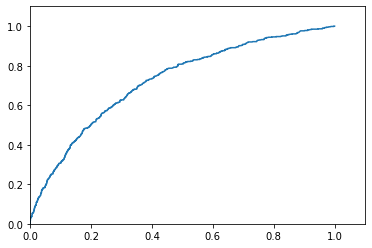

In [29]:
plt.plot( fpr_dz_list, tpr_dz_list ) 
plt.ylim(0, 1.1)
plt.xlim(0, 1.1)
plt.show()

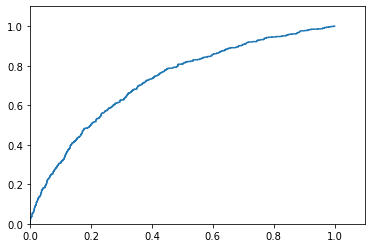

In [30]:
plt.plot( fpr, tpr ) 
plt.ylim(0, 1.1)
plt.xlim(0, 1.1)
plt.show()

# Precision - Recall

In [31]:
pers_list = []
rec_list = []
for porog in range(0, 10001, 1):
    tp = 0
    fp = 0 
    fn = 0
    tn = 0
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):
        if predicted_prob >= porog / 10000 :
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    print(f'tp = {tp}, fp = {fp}, fn = {fn},tn = {tn}, при пороге = {porog / 10000}' )
    if tp + fp == 0:
        pers = 0 
    else:
        pers = tp / (tp + fp)
    pers_list.append(pers)
    if tp + fn == 0:
        rec = 0 
    else:
        rec = tp / (tp + fn)
    rec_list.append(rec)

tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0001
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0002
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0003
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0004
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0005
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0006
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0007
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0008
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0009
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.001
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0011
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0012
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0013
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0014
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0015
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0016
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0

tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0187
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0188
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0189
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.019
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0191
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0192
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0193
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0194
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0195
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0196
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0197
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0198
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0199
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.02
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0201
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0202
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.0203
tp = 587, fp = 1323, fn = 0,tn = 0, при пороге = 0.

tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0382
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0383
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0384
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0385
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0386
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0387
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0388
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0389
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.039
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0391
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0392
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0393
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0394
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0395
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0396
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0397
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 0.0398
tp = 587, fp = 1322, fn = 0,tn = 1, при пороге = 

tp = 586, fp = 1313, fn = 1,tn = 10, при пороге = 0.0554
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.0555
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.0556
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.0557
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.0558
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.0559
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.056
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.0561
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.0562
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.0563
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.0564
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.0565
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.0566
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.0567
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.0568
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.0569
tp = 586, fp = 1312, fn = 1,tn = 11, при пороге = 0.057
tp = 586, fp = 1312, fn = 1,tn = 

tp = 583, fp = 1289, fn = 4,tn = 34, при пороге = 0.0727
tp = 583, fp = 1289, fn = 4,tn = 34, при пороге = 0.0728
tp = 583, fp = 1289, fn = 4,tn = 34, при пороге = 0.0729
tp = 583, fp = 1289, fn = 4,tn = 34, при пороге = 0.073
tp = 583, fp = 1289, fn = 4,tn = 34, при пороге = 0.0731
tp = 583, fp = 1287, fn = 4,tn = 36, при пороге = 0.0732
tp = 583, fp = 1287, fn = 4,tn = 36, при пороге = 0.0733
tp = 583, fp = 1285, fn = 4,tn = 38, при пороге = 0.0734
tp = 583, fp = 1285, fn = 4,tn = 38, при пороге = 0.0735
tp = 583, fp = 1285, fn = 4,tn = 38, при пороге = 0.0736
tp = 583, fp = 1285, fn = 4,tn = 38, при пороге = 0.0737
tp = 583, fp = 1285, fn = 4,tn = 38, при пороге = 0.0738
tp = 583, fp = 1285, fn = 4,tn = 38, при пороге = 0.0739
tp = 583, fp = 1285, fn = 4,tn = 38, при пороге = 0.074
tp = 583, fp = 1285, fn = 4,tn = 38, при пороге = 0.0741
tp = 583, fp = 1285, fn = 4,tn = 38, при пороге = 0.0742
tp = 583, fp = 1285, fn = 4,tn = 38, при пороге = 0.0743
tp = 583, fp = 1285, fn = 4,tn = 

tp = 578, fp = 1247, fn = 9,tn = 76, при пороге = 0.0889
tp = 578, fp = 1246, fn = 9,tn = 77, при пороге = 0.089
tp = 578, fp = 1244, fn = 9,tn = 79, при пороге = 0.0891
tp = 578, fp = 1244, fn = 9,tn = 79, при пороге = 0.0892
tp = 578, fp = 1244, fn = 9,tn = 79, при пороге = 0.0893
tp = 578, fp = 1244, fn = 9,tn = 79, при пороге = 0.0894
tp = 578, fp = 1244, fn = 9,tn = 79, при пороге = 0.0895
tp = 578, fp = 1244, fn = 9,tn = 79, при пороге = 0.0896
tp = 578, fp = 1244, fn = 9,tn = 79, при пороге = 0.0897
tp = 578, fp = 1244, fn = 9,tn = 79, при пороге = 0.0898
tp = 578, fp = 1244, fn = 9,tn = 79, при пороге = 0.0899
tp = 578, fp = 1244, fn = 9,tn = 79, при пороге = 0.09
tp = 578, fp = 1244, fn = 9,tn = 79, при пороге = 0.0901
tp = 578, fp = 1242, fn = 9,tn = 81, при пороге = 0.0902
tp = 578, fp = 1241, fn = 9,tn = 82, при пороге = 0.0903
tp = 578, fp = 1240, fn = 9,tn = 83, при пороге = 0.0904
tp = 578, fp = 1240, fn = 9,tn = 83, при пороге = 0.0905
tp = 578, fp = 1240, fn = 9,tn = 8

tp = 573, fp = 1185, fn = 14,tn = 138, при пороге = 0.1073
tp = 573, fp = 1185, fn = 14,tn = 138, при пороге = 0.1074
tp = 573, fp = 1185, fn = 14,tn = 138, при пороге = 0.1075
tp = 573, fp = 1184, fn = 14,tn = 139, при пороге = 0.1076
tp = 573, fp = 1184, fn = 14,tn = 139, при пороге = 0.1077
tp = 573, fp = 1184, fn = 14,tn = 139, при пороге = 0.1078
tp = 573, fp = 1184, fn = 14,tn = 139, при пороге = 0.1079
tp = 573, fp = 1184, fn = 14,tn = 139, при пороге = 0.108
tp = 573, fp = 1184, fn = 14,tn = 139, при пороге = 0.1081
tp = 573, fp = 1184, fn = 14,tn = 139, при пороге = 0.1082
tp = 573, fp = 1184, fn = 14,tn = 139, при пороге = 0.1083
tp = 573, fp = 1184, fn = 14,tn = 139, при пороге = 0.1084
tp = 573, fp = 1184, fn = 14,tn = 139, при пороге = 0.1085
tp = 573, fp = 1184, fn = 14,tn = 139, при пороге = 0.1086
tp = 573, fp = 1184, fn = 14,tn = 139, при пороге = 0.1087
tp = 573, fp = 1184, fn = 14,tn = 139, при пороге = 0.1088
tp = 573, fp = 1184, fn = 14,tn = 139, при пороге = 0.108

tp = 560, fp = 1113, fn = 27,tn = 210, при пороге = 0.1253
tp = 560, fp = 1113, fn = 27,tn = 210, при пороге = 0.1254
tp = 559, fp = 1113, fn = 28,tn = 210, при пороге = 0.1255
tp = 559, fp = 1112, fn = 28,tn = 211, при пороге = 0.1256
tp = 559, fp = 1111, fn = 28,tn = 212, при пороге = 0.1257
tp = 559, fp = 1111, fn = 28,tn = 212, при пороге = 0.1258
tp = 558, fp = 1111, fn = 29,tn = 212, при пороге = 0.1259
tp = 558, fp = 1111, fn = 29,tn = 212, при пороге = 0.126
tp = 558, fp = 1111, fn = 29,tn = 212, при пороге = 0.1261
tp = 558, fp = 1111, fn = 29,tn = 212, при пороге = 0.1262
tp = 558, fp = 1110, fn = 29,tn = 213, при пороге = 0.1263
tp = 558, fp = 1108, fn = 29,tn = 215, при пороге = 0.1264
tp = 558, fp = 1108, fn = 29,tn = 215, при пороге = 0.1265
tp = 558, fp = 1108, fn = 29,tn = 215, при пороге = 0.1266
tp = 558, fp = 1108, fn = 29,tn = 215, при пороге = 0.1267
tp = 558, fp = 1107, fn = 29,tn = 216, при пороге = 0.1268
tp = 558, fp = 1106, fn = 29,tn = 217, при пороге = 0.126

tp = 555, fp = 1050, fn = 32,tn = 273, при пороге = 0.1421
tp = 555, fp = 1050, fn = 32,tn = 273, при пороге = 0.1422
tp = 555, fp = 1050, fn = 32,tn = 273, при пороге = 0.1423
tp = 554, fp = 1050, fn = 33,tn = 273, при пороге = 0.1424
tp = 554, fp = 1050, fn = 33,tn = 273, при пороге = 0.1425
tp = 554, fp = 1048, fn = 33,tn = 275, при пороге = 0.1426
tp = 554, fp = 1046, fn = 33,tn = 277, при пороге = 0.1427
tp = 554, fp = 1046, fn = 33,tn = 277, при пороге = 0.1428
tp = 554, fp = 1046, fn = 33,tn = 277, при пороге = 0.1429
tp = 554, fp = 1046, fn = 33,tn = 277, при пороге = 0.143
tp = 554, fp = 1045, fn = 33,tn = 278, при пороге = 0.1431
tp = 554, fp = 1045, fn = 33,tn = 278, при пороге = 0.1432
tp = 554, fp = 1044, fn = 33,tn = 279, при пороге = 0.1433
tp = 554, fp = 1044, fn = 33,tn = 279, при пороге = 0.1434
tp = 554, fp = 1044, fn = 33,tn = 279, при пороге = 0.1435
tp = 554, fp = 1042, fn = 33,tn = 281, при пороге = 0.1436
tp = 554, fp = 1041, fn = 33,tn = 282, при пороге = 0.143

tp = 541, fp = 976, fn = 46,tn = 347, при пороге = 0.1597
tp = 541, fp = 976, fn = 46,tn = 347, при пороге = 0.1598
tp = 541, fp = 974, fn = 46,tn = 349, при пороге = 0.1599
tp = 541, fp = 973, fn = 46,tn = 350, при пороге = 0.16
tp = 541, fp = 973, fn = 46,tn = 350, при пороге = 0.1601
tp = 541, fp = 971, fn = 46,tn = 352, при пороге = 0.1602
tp = 541, fp = 970, fn = 46,tn = 353, при пороге = 0.1603
tp = 541, fp = 970, fn = 46,tn = 353, при пороге = 0.1604
tp = 541, fp = 970, fn = 46,tn = 353, при пороге = 0.1605
tp = 541, fp = 970, fn = 46,tn = 353, при пороге = 0.1606
tp = 541, fp = 970, fn = 46,tn = 353, при пороге = 0.1607
tp = 541, fp = 970, fn = 46,tn = 353, при пороге = 0.1608
tp = 541, fp = 970, fn = 46,tn = 353, при пороге = 0.1609
tp = 541, fp = 969, fn = 46,tn = 354, при пороге = 0.161
tp = 541, fp = 969, fn = 46,tn = 354, при пороге = 0.1611
tp = 541, fp = 969, fn = 46,tn = 354, при пороге = 0.1612
tp = 541, fp = 969, fn = 46,tn = 354, при пороге = 0.1613
tp = 541, fp = 96

tp = 525, fp = 901, fn = 62,tn = 422, при пороге = 0.1776
tp = 525, fp = 900, fn = 62,tn = 423, при пороге = 0.1777
tp = 525, fp = 900, fn = 62,tn = 423, при пороге = 0.1778
tp = 525, fp = 899, fn = 62,tn = 424, при пороге = 0.1779
tp = 525, fp = 899, fn = 62,tn = 424, при пороге = 0.178
tp = 525, fp = 899, fn = 62,tn = 424, при пороге = 0.1781
tp = 525, fp = 899, fn = 62,tn = 424, при пороге = 0.1782
tp = 525, fp = 899, fn = 62,tn = 424, при пороге = 0.1783
tp = 525, fp = 899, fn = 62,tn = 424, при пороге = 0.1784
tp = 525, fp = 899, fn = 62,tn = 424, при пороге = 0.1785
tp = 525, fp = 899, fn = 62,tn = 424, при пороге = 0.1786
tp = 525, fp = 898, fn = 62,tn = 425, при пороге = 0.1787
tp = 525, fp = 897, fn = 62,tn = 426, при пороге = 0.1788
tp = 525, fp = 896, fn = 62,tn = 427, при пороге = 0.1789
tp = 525, fp = 896, fn = 62,tn = 427, при пороге = 0.179
tp = 524, fp = 896, fn = 63,tn = 427, при пороге = 0.1791
tp = 524, fp = 896, fn = 63,tn = 427, при пороге = 0.1792
tp = 524, fp = 8

tp = 511, fp = 824, fn = 76,tn = 499, при пороге = 0.1954
tp = 510, fp = 824, fn = 77,tn = 499, при пороге = 0.1955
tp = 510, fp = 823, fn = 77,tn = 500, при пороге = 0.1956
tp = 509, fp = 823, fn = 78,tn = 500, при пороге = 0.1957
tp = 509, fp = 823, fn = 78,tn = 500, при пороге = 0.1958
tp = 509, fp = 822, fn = 78,tn = 501, при пороге = 0.1959
tp = 509, fp = 822, fn = 78,tn = 501, при пороге = 0.196
tp = 509, fp = 822, fn = 78,tn = 501, при пороге = 0.1961
tp = 509, fp = 822, fn = 78,tn = 501, при пороге = 0.1962
tp = 509, fp = 822, fn = 78,tn = 501, при пороге = 0.1963
tp = 509, fp = 821, fn = 78,tn = 502, при пороге = 0.1964
tp = 509, fp = 821, fn = 78,tn = 502, при пороге = 0.1965
tp = 509, fp = 821, fn = 78,tn = 502, при пороге = 0.1966
tp = 509, fp = 820, fn = 78,tn = 503, при пороге = 0.1967
tp = 509, fp = 820, fn = 78,tn = 503, при пороге = 0.1968
tp = 509, fp = 820, fn = 78,tn = 503, при пороге = 0.1969
tp = 509, fp = 820, fn = 78,tn = 503, при пороге = 0.197
tp = 507, fp = 8

tp = 495, fp = 759, fn = 92,tn = 564, при пороге = 0.2134
tp = 495, fp = 758, fn = 92,tn = 565, при пороге = 0.2135
tp = 494, fp = 757, fn = 93,tn = 566, при пороге = 0.2136
tp = 494, fp = 757, fn = 93,tn = 566, при пороге = 0.2137
tp = 494, fp = 755, fn = 93,tn = 568, при пороге = 0.2138
tp = 494, fp = 753, fn = 93,tn = 570, при пороге = 0.2139
tp = 494, fp = 753, fn = 93,tn = 570, при пороге = 0.214
tp = 494, fp = 752, fn = 93,tn = 571, при пороге = 0.2141
tp = 494, fp = 752, fn = 93,tn = 571, при пороге = 0.2142
tp = 493, fp = 752, fn = 94,tn = 571, при пороге = 0.2143
tp = 493, fp = 752, fn = 94,tn = 571, при пороге = 0.2144
tp = 493, fp = 752, fn = 94,tn = 571, при пороге = 0.2145
tp = 493, fp = 751, fn = 94,tn = 572, при пороге = 0.2146
tp = 493, fp = 751, fn = 94,tn = 572, при пороге = 0.2147
tp = 492, fp = 751, fn = 95,tn = 572, при пороге = 0.2148
tp = 492, fp = 751, fn = 95,tn = 572, при пороге = 0.2149
tp = 492, fp = 751, fn = 95,tn = 572, при пороге = 0.215
tp = 492, fp = 7

tp = 483, fp = 698, fn = 104,tn = 625, при пороге = 0.2306
tp = 483, fp = 698, fn = 104,tn = 625, при пороге = 0.2307
tp = 483, fp = 698, fn = 104,tn = 625, при пороге = 0.2308
tp = 483, fp = 697, fn = 104,tn = 626, при пороге = 0.2309
tp = 483, fp = 697, fn = 104,tn = 626, при пороге = 0.231
tp = 482, fp = 697, fn = 105,tn = 626, при пороге = 0.2311
tp = 482, fp = 697, fn = 105,tn = 626, при пороге = 0.2312
tp = 482, fp = 697, fn = 105,tn = 626, при пороге = 0.2313
tp = 482, fp = 697, fn = 105,tn = 626, при пороге = 0.2314
tp = 482, fp = 697, fn = 105,tn = 626, при пороге = 0.2315
tp = 482, fp = 697, fn = 105,tn = 626, при пороге = 0.2316
tp = 482, fp = 697, fn = 105,tn = 626, при пороге = 0.2317
tp = 482, fp = 696, fn = 105,tn = 627, при пороге = 0.2318
tp = 482, fp = 696, fn = 105,tn = 627, при пороге = 0.2319
tp = 482, fp = 696, fn = 105,tn = 627, при пороге = 0.232
tp = 482, fp = 694, fn = 105,tn = 629, при пороге = 0.2321
tp = 482, fp = 691, fn = 105,tn = 632, при пороге = 0.2322

tp = 468, fp = 641, fn = 119,tn = 682, при пороге = 0.2471
tp = 468, fp = 640, fn = 119,tn = 683, при пороге = 0.2472
tp = 468, fp = 640, fn = 119,tn = 683, при пороге = 0.2473
tp = 467, fp = 640, fn = 120,tn = 683, при пороге = 0.2474
tp = 467, fp = 640, fn = 120,tn = 683, при пороге = 0.2475
tp = 467, fp = 640, fn = 120,tn = 683, при пороге = 0.2476
tp = 467, fp = 640, fn = 120,tn = 683, при пороге = 0.2477
tp = 467, fp = 639, fn = 120,tn = 684, при пороге = 0.2478
tp = 467, fp = 639, fn = 120,tn = 684, при пороге = 0.2479
tp = 467, fp = 639, fn = 120,tn = 684, при пороге = 0.248
tp = 467, fp = 639, fn = 120,tn = 684, при пороге = 0.2481
tp = 467, fp = 639, fn = 120,tn = 684, при пороге = 0.2482
tp = 467, fp = 639, fn = 120,tn = 684, при пороге = 0.2483
tp = 467, fp = 638, fn = 120,tn = 685, при пороге = 0.2484
tp = 467, fp = 638, fn = 120,tn = 685, при пороге = 0.2485
tp = 467, fp = 638, fn = 120,tn = 685, при пороге = 0.2486
tp = 467, fp = 638, fn = 120,tn = 685, при пороге = 0.248

tp = 457, fp = 586, fn = 130,tn = 737, при пороге = 0.2634
tp = 456, fp = 586, fn = 131,tn = 737, при пороге = 0.2635
tp = 456, fp = 586, fn = 131,tn = 737, при пороге = 0.2636
tp = 456, fp = 586, fn = 131,tn = 737, при пороге = 0.2637
tp = 456, fp = 586, fn = 131,tn = 737, при пороге = 0.2638
tp = 454, fp = 585, fn = 133,tn = 738, при пороге = 0.2639
tp = 454, fp = 585, fn = 133,tn = 738, при пороге = 0.264
tp = 454, fp = 585, fn = 133,tn = 738, при пороге = 0.2641
tp = 454, fp = 585, fn = 133,tn = 738, при пороге = 0.2642
tp = 453, fp = 583, fn = 134,tn = 740, при пороге = 0.2643
tp = 453, fp = 583, fn = 134,tn = 740, при пороге = 0.2644
tp = 453, fp = 583, fn = 134,tn = 740, при пороге = 0.2645
tp = 453, fp = 583, fn = 134,tn = 740, при пороге = 0.2646
tp = 453, fp = 583, fn = 134,tn = 740, при пороге = 0.2647
tp = 453, fp = 583, fn = 134,tn = 740, при пороге = 0.2648
tp = 453, fp = 583, fn = 134,tn = 740, при пороге = 0.2649
tp = 453, fp = 583, fn = 134,tn = 740, при пороге = 0.265

tp = 432, fp = 533, fn = 155,tn = 790, при пороге = 0.2799
tp = 432, fp = 533, fn = 155,tn = 790, при пороге = 0.28
tp = 432, fp = 533, fn = 155,tn = 790, при пороге = 0.2801
tp = 432, fp = 533, fn = 155,tn = 790, при пороге = 0.2802
tp = 432, fp = 533, fn = 155,tn = 790, при пороге = 0.2803
tp = 432, fp = 531, fn = 155,tn = 792, при пороге = 0.2804
tp = 432, fp = 530, fn = 155,tn = 793, при пороге = 0.2805
tp = 432, fp = 530, fn = 155,tn = 793, при пороге = 0.2806
tp = 431, fp = 530, fn = 156,tn = 793, при пороге = 0.2807
tp = 431, fp = 530, fn = 156,tn = 793, при пороге = 0.2808
tp = 431, fp = 529, fn = 156,tn = 794, при пороге = 0.2809
tp = 431, fp = 529, fn = 156,tn = 794, при пороге = 0.281
tp = 431, fp = 529, fn = 156,tn = 794, при пороге = 0.2811
tp = 431, fp = 529, fn = 156,tn = 794, при пороге = 0.2812
tp = 431, fp = 529, fn = 156,tn = 794, при пороге = 0.2813
tp = 431, fp = 529, fn = 156,tn = 794, при пороге = 0.2814
tp = 430, fp = 528, fn = 157,tn = 795, при пороге = 0.2815


tp = 411, fp = 477, fn = 176,tn = 846, при пороге = 0.2968
tp = 411, fp = 477, fn = 176,tn = 846, при пороге = 0.2969
tp = 411, fp = 476, fn = 176,tn = 847, при пороге = 0.297
tp = 411, fp = 476, fn = 176,tn = 847, при пороге = 0.2971
tp = 411, fp = 476, fn = 176,tn = 847, при пороге = 0.2972
tp = 411, fp = 476, fn = 176,tn = 847, при пороге = 0.2973
tp = 411, fp = 476, fn = 176,tn = 847, при пороге = 0.2974
tp = 411, fp = 476, fn = 176,tn = 847, при пороге = 0.2975
tp = 411, fp = 476, fn = 176,tn = 847, при пороге = 0.2976
tp = 411, fp = 476, fn = 176,tn = 847, при пороге = 0.2977
tp = 411, fp = 475, fn = 176,tn = 848, при пороге = 0.2978
tp = 411, fp = 473, fn = 176,tn = 850, при пороге = 0.2979
tp = 411, fp = 473, fn = 176,tn = 850, при пороге = 0.298
tp = 411, fp = 473, fn = 176,tn = 850, при пороге = 0.2981
tp = 411, fp = 473, fn = 176,tn = 850, при пороге = 0.2982
tp = 411, fp = 473, fn = 176,tn = 850, при пороге = 0.2983
tp = 411, fp = 473, fn = 176,tn = 850, при пороге = 0.2984

tp = 394, fp = 442, fn = 193,tn = 881, при пороге = 0.3135
tp = 394, fp = 442, fn = 193,tn = 881, при пороге = 0.3136
tp = 393, fp = 442, fn = 194,tn = 881, при пороге = 0.3137
tp = 393, fp = 442, fn = 194,tn = 881, при пороге = 0.3138
tp = 393, fp = 442, fn = 194,tn = 881, при пороге = 0.3139
tp = 393, fp = 442, fn = 194,tn = 881, при пороге = 0.314
tp = 393, fp = 441, fn = 194,tn = 882, при пороге = 0.3141
tp = 393, fp = 441, fn = 194,tn = 882, при пороге = 0.3142
tp = 393, fp = 440, fn = 194,tn = 883, при пороге = 0.3143
tp = 393, fp = 439, fn = 194,tn = 884, при пороге = 0.3144
tp = 393, fp = 439, fn = 194,tn = 884, при пороге = 0.3145
tp = 393, fp = 439, fn = 194,tn = 884, при пороге = 0.3146
tp = 393, fp = 439, fn = 194,tn = 884, при пороге = 0.3147
tp = 393, fp = 439, fn = 194,tn = 884, при пороге = 0.3148
tp = 393, fp = 439, fn = 194,tn = 884, при пороге = 0.3149
tp = 393, fp = 439, fn = 194,tn = 884, при пороге = 0.315
tp = 393, fp = 439, fn = 194,tn = 884, при пороге = 0.3151

tp = 369, fp = 407, fn = 218,tn = 916, при пороге = 0.3301
tp = 369, fp = 407, fn = 218,tn = 916, при пороге = 0.3302
tp = 369, fp = 407, fn = 218,tn = 916, при пороге = 0.3303
tp = 369, fp = 407, fn = 218,tn = 916, при пороге = 0.3304
tp = 369, fp = 407, fn = 218,tn = 916, при пороге = 0.3305
tp = 369, fp = 407, fn = 218,tn = 916, при пороге = 0.3306
tp = 369, fp = 407, fn = 218,tn = 916, при пороге = 0.3307
tp = 369, fp = 406, fn = 218,tn = 917, при пороге = 0.3308
tp = 369, fp = 406, fn = 218,tn = 917, при пороге = 0.3309
tp = 369, fp = 406, fn = 218,tn = 917, при пороге = 0.331
tp = 369, fp = 406, fn = 218,tn = 917, при пороге = 0.3311
tp = 369, fp = 406, fn = 218,tn = 917, при пороге = 0.3312
tp = 369, fp = 406, fn = 218,tn = 917, при пороге = 0.3313
tp = 369, fp = 406, fn = 218,tn = 917, при пороге = 0.3314
tp = 369, fp = 406, fn = 218,tn = 917, при пороге = 0.3315
tp = 369, fp = 406, fn = 218,tn = 917, при пороге = 0.3316
tp = 369, fp = 406, fn = 218,tn = 917, при пороге = 0.331

tp = 355, fp = 369, fn = 232,tn = 954, при пороге = 0.3468
tp = 355, fp = 368, fn = 232,tn = 955, при пороге = 0.3469
tp = 355, fp = 367, fn = 232,tn = 956, при пороге = 0.347
tp = 355, fp = 367, fn = 232,tn = 956, при пороге = 0.3471
tp = 355, fp = 367, fn = 232,tn = 956, при пороге = 0.3472
tp = 355, fp = 367, fn = 232,tn = 956, при пороге = 0.3473
tp = 355, fp = 367, fn = 232,tn = 956, при пороге = 0.3474
tp = 355, fp = 367, fn = 232,tn = 956, при пороге = 0.3475
tp = 355, fp = 367, fn = 232,tn = 956, при пороге = 0.3476
tp = 355, fp = 367, fn = 232,tn = 956, при пороге = 0.3477
tp = 355, fp = 367, fn = 232,tn = 956, при пороге = 0.3478
tp = 355, fp = 367, fn = 232,tn = 956, при пороге = 0.3479
tp = 355, fp = 367, fn = 232,tn = 956, при пороге = 0.348
tp = 355, fp = 367, fn = 232,tn = 956, при пороге = 0.3481
tp = 355, fp = 367, fn = 232,tn = 956, при пороге = 0.3482
tp = 355, fp = 367, fn = 232,tn = 956, при пороге = 0.3483
tp = 355, fp = 367, fn = 232,tn = 956, при пороге = 0.3484

tp = 339, fp = 338, fn = 248,tn = 985, при пороге = 0.3634
tp = 339, fp = 338, fn = 248,tn = 985, при пороге = 0.3635
tp = 339, fp = 336, fn = 248,tn = 987, при пороге = 0.3636
tp = 338, fp = 335, fn = 249,tn = 988, при пороге = 0.3637
tp = 338, fp = 335, fn = 249,tn = 988, при пороге = 0.3638
tp = 336, fp = 334, fn = 251,tn = 989, при пороге = 0.3639
tp = 336, fp = 334, fn = 251,tn = 989, при пороге = 0.364
tp = 336, fp = 333, fn = 251,tn = 990, при пороге = 0.3641
tp = 336, fp = 333, fn = 251,tn = 990, при пороге = 0.3642
tp = 336, fp = 333, fn = 251,tn = 990, при пороге = 0.3643
tp = 336, fp = 333, fn = 251,tn = 990, при пороге = 0.3644
tp = 336, fp = 333, fn = 251,tn = 990, при пороге = 0.3645
tp = 336, fp = 333, fn = 251,tn = 990, при пороге = 0.3646
tp = 336, fp = 333, fn = 251,tn = 990, при пороге = 0.3647
tp = 336, fp = 332, fn = 251,tn = 991, при пороге = 0.3648
tp = 336, fp = 332, fn = 251,tn = 991, при пороге = 0.3649
tp = 336, fp = 331, fn = 251,tn = 992, при пороге = 0.365

tp = 320, fp = 307, fn = 267,tn = 1016, при пороге = 0.3805
tp = 320, fp = 307, fn = 267,tn = 1016, при пороге = 0.3806
tp = 320, fp = 307, fn = 267,tn = 1016, при пороге = 0.3807
tp = 320, fp = 307, fn = 267,tn = 1016, при пороге = 0.3808
tp = 320, fp = 307, fn = 267,tn = 1016, при пороге = 0.3809
tp = 320, fp = 307, fn = 267,tn = 1016, при пороге = 0.381
tp = 320, fp = 307, fn = 267,tn = 1016, при пороге = 0.3811
tp = 319, fp = 307, fn = 268,tn = 1016, при пороге = 0.3812
tp = 319, fp = 307, fn = 268,tn = 1016, при пороге = 0.3813
tp = 319, fp = 307, fn = 268,tn = 1016, при пороге = 0.3814
tp = 319, fp = 307, fn = 268,tn = 1016, при пороге = 0.3815
tp = 319, fp = 307, fn = 268,tn = 1016, при пороге = 0.3816
tp = 319, fp = 307, fn = 268,tn = 1016, при пороге = 0.3817
tp = 319, fp = 307, fn = 268,tn = 1016, при пороге = 0.3818
tp = 319, fp = 307, fn = 268,tn = 1016, при пороге = 0.3819
tp = 319, fp = 306, fn = 268,tn = 1017, при пороге = 0.382
tp = 319, fp = 306, fn = 268,tn = 1017, пр

tp = 303, fp = 279, fn = 284,tn = 1044, при пороге = 0.3978
tp = 302, fp = 277, fn = 285,tn = 1046, при пороге = 0.3979
tp = 302, fp = 277, fn = 285,tn = 1046, при пороге = 0.398
tp = 302, fp = 277, fn = 285,tn = 1046, при пороге = 0.3981
tp = 302, fp = 277, fn = 285,tn = 1046, при пороге = 0.3982
tp = 302, fp = 277, fn = 285,tn = 1046, при пороге = 0.3983
tp = 302, fp = 277, fn = 285,tn = 1046, при пороге = 0.3984
tp = 302, fp = 277, fn = 285,tn = 1046, при пороге = 0.3985
tp = 302, fp = 276, fn = 285,tn = 1047, при пороге = 0.3986
tp = 302, fp = 275, fn = 285,tn = 1048, при пороге = 0.3987
tp = 302, fp = 275, fn = 285,tn = 1048, при пороге = 0.3988
tp = 302, fp = 275, fn = 285,tn = 1048, при пороге = 0.3989
tp = 302, fp = 275, fn = 285,tn = 1048, при пороге = 0.399
tp = 302, fp = 275, fn = 285,tn = 1048, при пороге = 0.3991
tp = 302, fp = 275, fn = 285,tn = 1048, при пороге = 0.3992
tp = 301, fp = 275, fn = 286,tn = 1048, при пороге = 0.3993
tp = 301, fp = 274, fn = 286,tn = 1049, пр

tp = 288, fp = 255, fn = 299,tn = 1068, при пороге = 0.4149
tp = 288, fp = 255, fn = 299,tn = 1068, при пороге = 0.415
tp = 287, fp = 255, fn = 300,tn = 1068, при пороге = 0.4151
tp = 287, fp = 255, fn = 300,tn = 1068, при пороге = 0.4152
tp = 286, fp = 254, fn = 301,tn = 1069, при пороге = 0.4153
tp = 286, fp = 254, fn = 301,tn = 1069, при пороге = 0.4154
tp = 286, fp = 253, fn = 301,tn = 1070, при пороге = 0.4155
tp = 286, fp = 253, fn = 301,tn = 1070, при пороге = 0.4156
tp = 286, fp = 253, fn = 301,tn = 1070, при пороге = 0.4157
tp = 286, fp = 252, fn = 301,tn = 1071, при пороге = 0.4158
tp = 286, fp = 252, fn = 301,tn = 1071, при пороге = 0.4159
tp = 286, fp = 252, fn = 301,tn = 1071, при пороге = 0.416
tp = 286, fp = 252, fn = 301,tn = 1071, при пороге = 0.4161
tp = 286, fp = 252, fn = 301,tn = 1071, при пороге = 0.4162
tp = 286, fp = 252, fn = 301,tn = 1071, при пороге = 0.4163
tp = 286, fp = 252, fn = 301,tn = 1071, при пороге = 0.4164
tp = 286, fp = 252, fn = 301,tn = 1071, пр

tp = 279, fp = 232, fn = 308,tn = 1091, при пороге = 0.4315
tp = 278, fp = 232, fn = 309,tn = 1091, при пороге = 0.4316
tp = 278, fp = 232, fn = 309,tn = 1091, при пороге = 0.4317
tp = 277, fp = 232, fn = 310,tn = 1091, при пороге = 0.4318
tp = 277, fp = 232, fn = 310,tn = 1091, при пороге = 0.4319
tp = 277, fp = 232, fn = 310,tn = 1091, при пороге = 0.432
tp = 277, fp = 232, fn = 310,tn = 1091, при пороге = 0.4321
tp = 277, fp = 231, fn = 310,tn = 1092, при пороге = 0.4322
tp = 277, fp = 231, fn = 310,tn = 1092, при пороге = 0.4323
tp = 277, fp = 230, fn = 310,tn = 1093, при пороге = 0.4324
tp = 277, fp = 230, fn = 310,tn = 1093, при пороге = 0.4325
tp = 277, fp = 228, fn = 310,tn = 1095, при пороге = 0.4326
tp = 277, fp = 228, fn = 310,tn = 1095, при пороге = 0.4327
tp = 277, fp = 228, fn = 310,tn = 1095, при пороге = 0.4328
tp = 277, fp = 228, fn = 310,tn = 1095, при пороге = 0.4329
tp = 277, fp = 228, fn = 310,tn = 1095, при пороге = 0.433
tp = 276, fp = 228, fn = 311,tn = 1095, пр

tp = 259, fp = 215, fn = 328,tn = 1108, при пороге = 0.4489
tp = 259, fp = 215, fn = 328,tn = 1108, при пороге = 0.449
tp = 259, fp = 215, fn = 328,tn = 1108, при пороге = 0.4491
tp = 259, fp = 215, fn = 328,tn = 1108, при пороге = 0.4492
tp = 259, fp = 214, fn = 328,tn = 1109, при пороге = 0.4493
tp = 259, fp = 214, fn = 328,tn = 1109, при пороге = 0.4494
tp = 259, fp = 214, fn = 328,tn = 1109, при пороге = 0.4495
tp = 259, fp = 214, fn = 328,tn = 1109, при пороге = 0.4496
tp = 259, fp = 213, fn = 328,tn = 1110, при пороге = 0.4497
tp = 259, fp = 213, fn = 328,tn = 1110, при пороге = 0.4498
tp = 259, fp = 213, fn = 328,tn = 1110, при пороге = 0.4499
tp = 259, fp = 213, fn = 328,tn = 1110, при пороге = 0.45
tp = 259, fp = 213, fn = 328,tn = 1110, при пороге = 0.4501
tp = 259, fp = 213, fn = 328,tn = 1110, при пороге = 0.4502
tp = 259, fp = 213, fn = 328,tn = 1110, при пороге = 0.4503
tp = 258, fp = 213, fn = 329,tn = 1110, при пороге = 0.4504
tp = 258, fp = 213, fn = 329,tn = 1110, при

tp = 248, fp = 198, fn = 339,tn = 1125, при пороге = 0.4655
tp = 248, fp = 198, fn = 339,tn = 1125, при пороге = 0.4656
tp = 248, fp = 198, fn = 339,tn = 1125, при пороге = 0.4657
tp = 247, fp = 198, fn = 340,tn = 1125, при пороге = 0.4658
tp = 247, fp = 198, fn = 340,tn = 1125, при пороге = 0.4659
tp = 247, fp = 198, fn = 340,tn = 1125, при пороге = 0.466
tp = 247, fp = 198, fn = 340,tn = 1125, при пороге = 0.4661
tp = 247, fp = 198, fn = 340,tn = 1125, при пороге = 0.4662
tp = 247, fp = 198, fn = 340,tn = 1125, при пороге = 0.4663
tp = 247, fp = 198, fn = 340,tn = 1125, при пороге = 0.4664
tp = 247, fp = 198, fn = 340,tn = 1125, при пороге = 0.4665
tp = 247, fp = 198, fn = 340,tn = 1125, при пороге = 0.4666
tp = 247, fp = 198, fn = 340,tn = 1125, при пороге = 0.4667
tp = 247, fp = 198, fn = 340,tn = 1125, при пороге = 0.4668
tp = 247, fp = 197, fn = 340,tn = 1126, при пороге = 0.4669
tp = 247, fp = 197, fn = 340,tn = 1126, при пороге = 0.467
tp = 247, fp = 197, fn = 340,tn = 1126, пр

tp = 233, fp = 176, fn = 354,tn = 1147, при пороге = 0.4832
tp = 233, fp = 176, fn = 354,tn = 1147, при пороге = 0.4833
tp = 233, fp = 176, fn = 354,tn = 1147, при пороге = 0.4834
tp = 233, fp = 176, fn = 354,tn = 1147, при пороге = 0.4835
tp = 233, fp = 176, fn = 354,tn = 1147, при пороге = 0.4836
tp = 233, fp = 176, fn = 354,tn = 1147, при пороге = 0.4837
tp = 233, fp = 176, fn = 354,tn = 1147, при пороге = 0.4838
tp = 233, fp = 175, fn = 354,tn = 1148, при пороге = 0.4839
tp = 233, fp = 175, fn = 354,tn = 1148, при пороге = 0.484
tp = 233, fp = 174, fn = 354,tn = 1149, при пороге = 0.4841
tp = 233, fp = 174, fn = 354,tn = 1149, при пороге = 0.4842
tp = 233, fp = 174, fn = 354,tn = 1149, при пороге = 0.4843
tp = 233, fp = 174, fn = 354,tn = 1149, при пороге = 0.4844
tp = 233, fp = 174, fn = 354,tn = 1149, при пороге = 0.4845
tp = 233, fp = 174, fn = 354,tn = 1149, при пороге = 0.4846
tp = 233, fp = 174, fn = 354,tn = 1149, при пороге = 0.4847
tp = 233, fp = 174, fn = 354,tn = 1149, п

tp = 222, fp = 170, fn = 365,tn = 1153, при пороге = 0.4981
tp = 222, fp = 169, fn = 365,tn = 1154, при пороге = 0.4982
tp = 222, fp = 169, fn = 365,tn = 1154, при пороге = 0.4983
tp = 222, fp = 169, fn = 365,tn = 1154, при пороге = 0.4984
tp = 221, fp = 169, fn = 366,tn = 1154, при пороге = 0.4985
tp = 221, fp = 169, fn = 366,tn = 1154, при пороге = 0.4986
tp = 221, fp = 169, fn = 366,tn = 1154, при пороге = 0.4987
tp = 221, fp = 169, fn = 366,tn = 1154, при пороге = 0.4988
tp = 221, fp = 169, fn = 366,tn = 1154, при пороге = 0.4989
tp = 221, fp = 169, fn = 366,tn = 1154, при пороге = 0.499
tp = 221, fp = 169, fn = 366,tn = 1154, при пороге = 0.4991
tp = 221, fp = 169, fn = 366,tn = 1154, при пороге = 0.4992
tp = 221, fp = 169, fn = 366,tn = 1154, при пороге = 0.4993
tp = 221, fp = 169, fn = 366,tn = 1154, при пороге = 0.4994
tp = 221, fp = 168, fn = 366,tn = 1155, при пороге = 0.4995
tp = 221, fp = 168, fn = 366,tn = 1155, при пороге = 0.4996
tp = 221, fp = 168, fn = 366,tn = 1155, п

tp = 207, fp = 155, fn = 380,tn = 1168, при пороге = 0.517
tp = 207, fp = 155, fn = 380,tn = 1168, при пороге = 0.5171
tp = 207, fp = 155, fn = 380,tn = 1168, при пороге = 0.5172
tp = 207, fp = 154, fn = 380,tn = 1169, при пороге = 0.5173
tp = 207, fp = 154, fn = 380,tn = 1169, при пороге = 0.5174
tp = 207, fp = 154, fn = 380,tn = 1169, при пороге = 0.5175
tp = 207, fp = 154, fn = 380,tn = 1169, при пороге = 0.5176
tp = 207, fp = 154, fn = 380,tn = 1169, при пороге = 0.5177
tp = 207, fp = 154, fn = 380,tn = 1169, при пороге = 0.5178
tp = 207, fp = 154, fn = 380,tn = 1169, при пороге = 0.5179
tp = 207, fp = 154, fn = 380,tn = 1169, при пороге = 0.518
tp = 207, fp = 154, fn = 380,tn = 1169, при пороге = 0.5181
tp = 206, fp = 154, fn = 381,tn = 1169, при пороге = 0.5182
tp = 206, fp = 154, fn = 381,tn = 1169, при пороге = 0.5183
tp = 206, fp = 154, fn = 381,tn = 1169, при пороге = 0.5184
tp = 206, fp = 154, fn = 381,tn = 1169, при пороге = 0.5185
tp = 206, fp = 154, fn = 381,tn = 1169, пр

tp = 187, fp = 139, fn = 400,tn = 1184, при пороге = 0.5357
tp = 187, fp = 139, fn = 400,tn = 1184, при пороге = 0.5358
tp = 187, fp = 139, fn = 400,tn = 1184, при пороге = 0.5359
tp = 187, fp = 139, fn = 400,tn = 1184, при пороге = 0.536
tp = 187, fp = 139, fn = 400,tn = 1184, при пороге = 0.5361
tp = 187, fp = 139, fn = 400,tn = 1184, при пороге = 0.5362
tp = 187, fp = 139, fn = 400,tn = 1184, при пороге = 0.5363
tp = 187, fp = 139, fn = 400,tn = 1184, при пороге = 0.5364
tp = 187, fp = 138, fn = 400,tn = 1185, при пороге = 0.5365
tp = 187, fp = 138, fn = 400,tn = 1185, при пороге = 0.5366
tp = 187, fp = 138, fn = 400,tn = 1185, при пороге = 0.5367
tp = 187, fp = 138, fn = 400,tn = 1185, при пороге = 0.5368
tp = 187, fp = 138, fn = 400,tn = 1185, при пороге = 0.5369
tp = 187, fp = 138, fn = 400,tn = 1185, при пороге = 0.537
tp = 187, fp = 137, fn = 400,tn = 1186, при пороге = 0.5371
tp = 187, fp = 137, fn = 400,tn = 1186, при пороге = 0.5372
tp = 187, fp = 137, fn = 400,tn = 1186, пр

tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5527
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5528
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5529
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.553
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5531
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5532
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5533
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5534
tp = 177, fp = 123, fn = 410,tn = 1200, при пороге = 0.5535
tp = 176, fp = 123, fn = 411,tn = 1200, при пороге = 0.5536
tp = 176, fp = 123, fn = 411,tn = 1200, при пороге = 0.5537
tp = 176, fp = 123, fn = 411,tn = 1200, при пороге = 0.5538
tp = 175, fp = 123, fn = 412,tn = 1200, при пороге = 0.5539
tp = 175, fp = 123, fn = 412,tn = 1200, при пороге = 0.554
tp = 175, fp = 123, fn = 412,tn = 1200, при пороге = 0.5541
tp = 175, fp = 121, fn = 412,tn = 1202, при пороге = 0.5542
tp = 175, fp = 121, fn = 412,tn = 1202, пр

tp = 161, fp = 107, fn = 426,tn = 1216, при пороге = 0.5705
tp = 161, fp = 107, fn = 426,tn = 1216, при пороге = 0.5706
tp = 161, fp = 107, fn = 426,tn = 1216, при пороге = 0.5707
tp = 161, fp = 107, fn = 426,tn = 1216, при пороге = 0.5708
tp = 161, fp = 107, fn = 426,tn = 1216, при пороге = 0.5709
tp = 161, fp = 107, fn = 426,tn = 1216, при пороге = 0.571
tp = 161, fp = 107, fn = 426,tn = 1216, при пороге = 0.5711
tp = 161, fp = 106, fn = 426,tn = 1217, при пороге = 0.5712
tp = 161, fp = 106, fn = 426,tn = 1217, при пороге = 0.5713
tp = 161, fp = 106, fn = 426,tn = 1217, при пороге = 0.5714
tp = 161, fp = 105, fn = 426,tn = 1218, при пороге = 0.5715
tp = 161, fp = 105, fn = 426,tn = 1218, при пороге = 0.5716
tp = 161, fp = 105, fn = 426,tn = 1218, при пороге = 0.5717
tp = 161, fp = 105, fn = 426,tn = 1218, при пороге = 0.5718
tp = 161, fp = 105, fn = 426,tn = 1218, при пороге = 0.5719
tp = 161, fp = 105, fn = 426,tn = 1218, при пороге = 0.572
tp = 161, fp = 105, fn = 426,tn = 1218, пр

tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.5876
tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.5877
tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.5878
tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.5879
tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.588
tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.5881
tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.5882
tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.5883
tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.5884
tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.5885
tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.5886
tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.5887
tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.5888
tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.5889
tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.589
tp = 152, fp = 99, fn = 435,tn = 1224, при пороге = 0.5891
tp = 151, fp = 99, fn = 436,tn = 1224, при пороге = 0.5892

tp = 138, fp = 85, fn = 449,tn = 1238, при пороге = 0.6048
tp = 138, fp = 84, fn = 449,tn = 1239, при пороге = 0.6049
tp = 138, fp = 83, fn = 449,tn = 1240, при пороге = 0.605
tp = 138, fp = 83, fn = 449,tn = 1240, при пороге = 0.6051
tp = 138, fp = 83, fn = 449,tn = 1240, при пороге = 0.6052
tp = 138, fp = 83, fn = 449,tn = 1240, при пороге = 0.6053
tp = 138, fp = 83, fn = 449,tn = 1240, при пороге = 0.6054
tp = 138, fp = 83, fn = 449,tn = 1240, при пороге = 0.6055
tp = 138, fp = 83, fn = 449,tn = 1240, при пороге = 0.6056
tp = 137, fp = 83, fn = 450,tn = 1240, при пороге = 0.6057
tp = 137, fp = 83, fn = 450,tn = 1240, при пороге = 0.6058
tp = 137, fp = 83, fn = 450,tn = 1240, при пороге = 0.6059
tp = 137, fp = 83, fn = 450,tn = 1240, при пороге = 0.606
tp = 137, fp = 83, fn = 450,tn = 1240, при пороге = 0.6061
tp = 137, fp = 83, fn = 450,tn = 1240, при пороге = 0.6062
tp = 136, fp = 83, fn = 451,tn = 1240, при пороге = 0.6063
tp = 136, fp = 83, fn = 451,tn = 1240, при пороге = 0.6064

tp = 124, fp = 72, fn = 463,tn = 1251, при пороге = 0.6225
tp = 124, fp = 72, fn = 463,tn = 1251, при пороге = 0.6226
tp = 124, fp = 72, fn = 463,tn = 1251, при пороге = 0.6227
tp = 124, fp = 72, fn = 463,tn = 1251, при пороге = 0.6228
tp = 124, fp = 72, fn = 463,tn = 1251, при пороге = 0.6229
tp = 124, fp = 72, fn = 463,tn = 1251, при пороге = 0.623
tp = 123, fp = 72, fn = 464,tn = 1251, при пороге = 0.6231
tp = 123, fp = 72, fn = 464,tn = 1251, при пороге = 0.6232
tp = 123, fp = 72, fn = 464,tn = 1251, при пороге = 0.6233
tp = 123, fp = 72, fn = 464,tn = 1251, при пороге = 0.6234
tp = 123, fp = 72, fn = 464,tn = 1251, при пороге = 0.6235
tp = 123, fp = 72, fn = 464,tn = 1251, при пороге = 0.6236
tp = 122, fp = 72, fn = 465,tn = 1251, при пороге = 0.6237
tp = 122, fp = 72, fn = 465,tn = 1251, при пороге = 0.6238
tp = 122, fp = 72, fn = 465,tn = 1251, при пороге = 0.6239
tp = 122, fp = 72, fn = 465,tn = 1251, при пороге = 0.624
tp = 122, fp = 72, fn = 465,tn = 1251, при пороге = 0.6241

tp = 113, fp = 66, fn = 474,tn = 1257, при пороге = 0.6405
tp = 112, fp = 66, fn = 475,tn = 1257, при пороге = 0.6406
tp = 112, fp = 66, fn = 475,tn = 1257, при пороге = 0.6407
tp = 112, fp = 66, fn = 475,tn = 1257, при пороге = 0.6408
tp = 112, fp = 66, fn = 475,tn = 1257, при пороге = 0.6409
tp = 112, fp = 66, fn = 475,tn = 1257, при пороге = 0.641
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6411
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6412
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6413
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6414
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6415
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6416
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6417
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6418
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6419
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.642
tp = 111, fp = 65, fn = 476,tn = 1258, при пороге = 0.6421

tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6578
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6579
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.658
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6581
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6582
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6583
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6584
tp = 106, fp = 57, fn = 481,tn = 1266, при пороге = 0.6585
tp = 106, fp = 56, fn = 481,tn = 1267, при пороге = 0.6586
tp = 106, fp = 56, fn = 481,tn = 1267, при пороге = 0.6587
tp = 106, fp = 56, fn = 481,tn = 1267, при пороге = 0.6588
tp = 106, fp = 56, fn = 481,tn = 1267, при пороге = 0.6589
tp = 106, fp = 56, fn = 481,tn = 1267, при пороге = 0.659
tp = 106, fp = 56, fn = 481,tn = 1267, при пороге = 0.6591
tp = 105, fp = 56, fn = 482,tn = 1267, при пороге = 0.6592
tp = 105, fp = 56, fn = 482,tn = 1267, при пороге = 0.6593
tp = 105, fp = 56, fn = 482,tn = 1267, при пороге = 0.6594

tp = 97, fp = 49, fn = 490,tn = 1274, при пороге = 0.675
tp = 97, fp = 49, fn = 490,tn = 1274, при пороге = 0.6751
tp = 97, fp = 49, fn = 490,tn = 1274, при пороге = 0.6752
tp = 97, fp = 49, fn = 490,tn = 1274, при пороге = 0.6753
tp = 97, fp = 49, fn = 490,tn = 1274, при пороге = 0.6754
tp = 96, fp = 49, fn = 491,tn = 1274, при пороге = 0.6755
tp = 96, fp = 49, fn = 491,tn = 1274, при пороге = 0.6756
tp = 96, fp = 49, fn = 491,tn = 1274, при пороге = 0.6757
tp = 96, fp = 49, fn = 491,tn = 1274, при пороге = 0.6758
tp = 96, fp = 49, fn = 491,tn = 1274, при пороге = 0.6759
tp = 96, fp = 49, fn = 491,tn = 1274, при пороге = 0.676
tp = 96, fp = 49, fn = 491,tn = 1274, при пороге = 0.6761
tp = 96, fp = 49, fn = 491,tn = 1274, при пороге = 0.6762
tp = 96, fp = 49, fn = 491,tn = 1274, при пороге = 0.6763
tp = 96, fp = 49, fn = 491,tn = 1274, при пороге = 0.6764
tp = 96, fp = 49, fn = 491,tn = 1274, при пороге = 0.6765
tp = 96, fp = 49, fn = 491,tn = 1274, при пороге = 0.6766
tp = 96, fp = 49

tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.6924
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.6925
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.6926
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.6927
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.6928
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.6929
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.693
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.6931
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.6932
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.6933
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.6934
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.6935
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.6936
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.6937
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.6938
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.6939
tp = 89, fp = 46, fn = 498,tn = 1277, при пороге = 0.694
tp = 89, fp = 46

tp = 80, fp = 41, fn = 507,tn = 1282, при пороге = 0.7099
tp = 80, fp = 41, fn = 507,tn = 1282, при пороге = 0.71
tp = 80, fp = 41, fn = 507,tn = 1282, при пороге = 0.7101
tp = 80, fp = 41, fn = 507,tn = 1282, при пороге = 0.7102
tp = 80, fp = 41, fn = 507,tn = 1282, при пороге = 0.7103
tp = 80, fp = 41, fn = 507,tn = 1282, при пороге = 0.7104
tp = 80, fp = 41, fn = 507,tn = 1282, при пороге = 0.7105
tp = 80, fp = 41, fn = 507,tn = 1282, при пороге = 0.7106
tp = 80, fp = 41, fn = 507,tn = 1282, при пороге = 0.7107
tp = 80, fp = 41, fn = 507,tn = 1282, при пороге = 0.7108
tp = 80, fp = 41, fn = 507,tn = 1282, при пороге = 0.7109
tp = 80, fp = 41, fn = 507,tn = 1282, при пороге = 0.711
tp = 80, fp = 41, fn = 507,tn = 1282, при пороге = 0.7111
tp = 80, fp = 41, fn = 507,tn = 1282, при пороге = 0.7112
tp = 80, fp = 38, fn = 507,tn = 1285, при пороге = 0.7113
tp = 80, fp = 38, fn = 507,tn = 1285, при пороге = 0.7114
tp = 80, fp = 38, fn = 507,tn = 1285, при пороге = 0.7115
tp = 80, fp = 38,

tp = 72, fp = 33, fn = 515,tn = 1290, при пороге = 0.7271
tp = 72, fp = 33, fn = 515,tn = 1290, при пороге = 0.7272
tp = 72, fp = 33, fn = 515,tn = 1290, при пороге = 0.7273
tp = 72, fp = 33, fn = 515,tn = 1290, при пороге = 0.7274
tp = 72, fp = 33, fn = 515,tn = 1290, при пороге = 0.7275
tp = 72, fp = 33, fn = 515,tn = 1290, при пороге = 0.7276
tp = 72, fp = 33, fn = 515,tn = 1290, при пороге = 0.7277
tp = 72, fp = 33, fn = 515,tn = 1290, при пороге = 0.7278
tp = 72, fp = 33, fn = 515,tn = 1290, при пороге = 0.7279
tp = 72, fp = 33, fn = 515,tn = 1290, при пороге = 0.728
tp = 72, fp = 33, fn = 515,tn = 1290, при пороге = 0.7281
tp = 72, fp = 33, fn = 515,tn = 1290, при пороге = 0.7282
tp = 71, fp = 33, fn = 516,tn = 1290, при пороге = 0.7283
tp = 71, fp = 33, fn = 516,tn = 1290, при пороге = 0.7284
tp = 71, fp = 32, fn = 516,tn = 1291, при пороге = 0.7285
tp = 71, fp = 32, fn = 516,tn = 1291, при пороге = 0.7286
tp = 71, fp = 32, fn = 516,tn = 1291, при пороге = 0.7287
tp = 71, fp = 3

tp = 65, fp = 28, fn = 522,tn = 1295, при пороге = 0.7443
tp = 65, fp = 28, fn = 522,tn = 1295, при пороге = 0.7444
tp = 65, fp = 28, fn = 522,tn = 1295, при пороге = 0.7445
tp = 65, fp = 28, fn = 522,tn = 1295, при пороге = 0.7446
tp = 65, fp = 28, fn = 522,tn = 1295, при пороге = 0.7447
tp = 65, fp = 28, fn = 522,tn = 1295, при пороге = 0.7448
tp = 65, fp = 28, fn = 522,tn = 1295, при пороге = 0.7449
tp = 65, fp = 28, fn = 522,tn = 1295, при пороге = 0.745
tp = 65, fp = 28, fn = 522,tn = 1295, при пороге = 0.7451
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7452
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7453
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7454
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7455
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7456
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7457
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7458
tp = 64, fp = 28, fn = 523,tn = 1295, при пороге = 0.7459
tp = 64, fp = 2

tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7616
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7617
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7618
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7619
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.762
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7621
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7622
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7623
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7624
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7625
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7626
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7627
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7628
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7629
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.763
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7631
tp = 56, fp = 25, fn = 531,tn = 1298, при пороге = 0.7632
tp = 56, fp = 25

tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7799
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.78
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7801
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7802
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7803
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7804
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7805
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7806
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7807
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7808
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7809
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.781
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7811
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7812
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7813
tp = 49, fp = 21, fn = 538,tn = 1302, при пороге = 0.7814
tp = 49, fp = 20, fn = 538,tn = 1303, при пороге = 0.7815
tp = 49, fp = 20,

tp = 37, fp = 16, fn = 550,tn = 1307, при пороге = 0.7968
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7969
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.797
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7971
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7972
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7973
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7974
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7975
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7976
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7977
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7978
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7979
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.798
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7981
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7982
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7983
tp = 37, fp = 15, fn = 550,tn = 1308, при пороге = 0.7984
tp = 37, fp = 15

tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.8147
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.8148
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.8149
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.815
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.8151
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.8152
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.8153
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.8154
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.8155
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.8156
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.8157
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.8158
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.8159
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.816
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.8161
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.8162
tp = 33, fp = 14, fn = 554,tn = 1309, при пороге = 0.8163
tp = 33, fp = 13

tp = 25, fp = 8, fn = 562,tn = 1315, при пороге = 0.8322
tp = 25, fp = 8, fn = 562,tn = 1315, при пороге = 0.8323
tp = 25, fp = 8, fn = 562,tn = 1315, при пороге = 0.8324
tp = 25, fp = 8, fn = 562,tn = 1315, при пороге = 0.8325
tp = 25, fp = 8, fn = 562,tn = 1315, при пороге = 0.8326
tp = 25, fp = 8, fn = 562,tn = 1315, при пороге = 0.8327
tp = 25, fp = 8, fn = 562,tn = 1315, при пороге = 0.8328
tp = 25, fp = 8, fn = 562,tn = 1315, при пороге = 0.8329
tp = 25, fp = 8, fn = 562,tn = 1315, при пороге = 0.833
tp = 25, fp = 8, fn = 562,tn = 1315, при пороге = 0.8331
tp = 25, fp = 8, fn = 562,tn = 1315, при пороге = 0.8332
tp = 25, fp = 8, fn = 562,tn = 1315, при пороге = 0.8333
tp = 25, fp = 8, fn = 562,tn = 1315, при пороге = 0.8334
tp = 25, fp = 8, fn = 562,tn = 1315, при пороге = 0.8335
tp = 25, fp = 8, fn = 562,tn = 1315, при пороге = 0.8336
tp = 24, fp = 8, fn = 563,tn = 1315, при пороге = 0.8337
tp = 24, fp = 8, fn = 563,tn = 1315, при пороге = 0.8338
tp = 24, fp = 8, fn = 563,tn = 1

tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8493
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8494
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8495
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8496
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8497
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8498
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8499
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.85
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8501
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8502
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8503
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8504
tp = 22, fp = 6, fn = 565,tn = 1317, при пороге = 0.8505
tp = 21, fp = 6, fn = 566,tn = 1317, при пороге = 0.8506
tp = 21, fp = 6, fn = 566,tn = 1317, при пороге = 0.8507
tp = 21, fp = 6, fn = 566,tn = 1317, при пороге = 0.8508
tp = 21, fp = 6, fn = 566,tn = 1317, при пороге = 0.8509
tp = 21, fp = 6, fn = 566,tn = 13

tp = 20, fp = 3, fn = 567,tn = 1320, при пороге = 0.8666
tp = 20, fp = 3, fn = 567,tn = 1320, при пороге = 0.8667
tp = 20, fp = 3, fn = 567,tn = 1320, при пороге = 0.8668
tp = 19, fp = 3, fn = 568,tn = 1320, при пороге = 0.8669
tp = 19, fp = 3, fn = 568,tn = 1320, при пороге = 0.867
tp = 19, fp = 3, fn = 568,tn = 1320, при пороге = 0.8671
tp = 19, fp = 3, fn = 568,tn = 1320, при пороге = 0.8672
tp = 19, fp = 3, fn = 568,tn = 1320, при пороге = 0.8673
tp = 19, fp = 3, fn = 568,tn = 1320, при пороге = 0.8674
tp = 19, fp = 3, fn = 568,tn = 1320, при пороге = 0.8675
tp = 19, fp = 3, fn = 568,tn = 1320, при пороге = 0.8676
tp = 19, fp = 3, fn = 568,tn = 1320, при пороге = 0.8677
tp = 19, fp = 3, fn = 568,tn = 1320, при пороге = 0.8678
tp = 19, fp = 3, fn = 568,tn = 1320, при пороге = 0.8679
tp = 19, fp = 3, fn = 568,tn = 1320, при пороге = 0.868
tp = 19, fp = 3, fn = 568,tn = 1320, при пороге = 0.8681
tp = 19, fp = 3, fn = 568,tn = 1320, при пороге = 0.8682
tp = 19, fp = 3, fn = 568,tn = 13

tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.8835
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.8836
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.8837
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.8838
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.8839
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.884
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.8841
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.8842
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.8843
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.8844
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.8845
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.8846
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.8847
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.8848
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.8849
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.885
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0.8851
tp = 7, fp = 0, fn = 580,tn = 1323, при пороге = 0

tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9016
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9017
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9018
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9019
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.902
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9021
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9022
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9023
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9024
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9025
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9026
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9027
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9028
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9029
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.903
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9031
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0.9032
tp = 3, fp = 0, fn = 584,tn = 1323, при пороге = 0

tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.9196
tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.9197
tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.9198
tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.9199
tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.92
tp = 2, fp = 0, fn = 585,tn = 1323, при пороге = 0.9201
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9202
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9203
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9204
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9205
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9206
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9207
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9208
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9209
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.921
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9211
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9212
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.

tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9369
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.937
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9371
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9372
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9373
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9374
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9375
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9376
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9377
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9378
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9379
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.938
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9381
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9382
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9383
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9384
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0.9385
tp = 1, fp = 0, fn = 586,tn = 1323, при пороге = 0

tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9552
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9553
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9554
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9555
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9556
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9557
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9558
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9559
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.956
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9561
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9562
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9563
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9564
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9565
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9566
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9567
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9568
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 

tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9726
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9727
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9728
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9729
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.973
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9731
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9732
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9733
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9734
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9735
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9736
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9737
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9738
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9739
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.974
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9741
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9742
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0

tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9904
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9905
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9906
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9907
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9908
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9909
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.991
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9911
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9912
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9913
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9914
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9915
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9916
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9917
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9918
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.9919
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0.992
tp = 0, fp = 0, fn = 587,tn = 1323, при пороге = 0

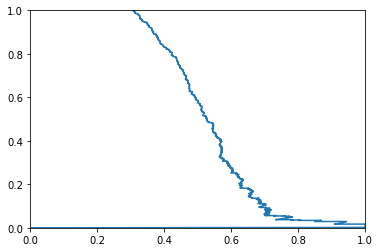

In [32]:
plt.plot( pers_list, rec_list ) 
plt.ylim(0, 1.000001)
plt.xlim(0, 1.000001)
plt.show()

# КОНЕЦ ДЗ КОНЕЦ ДЗ  КОНЕЦ ДЗ КОНЕЦ ДЗ КОНЕЦ ДЗ  КОНЕЦ ДЗ  

**Построим еще одну модель и сравним их между собой**

In [33]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [34]:
model2 = LogisticRegression()

In [35]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [36]:
model2.fit( X_train_short, Y_train )

LogisticRegression()

In [37]:
predictions2 = model2.predict_proba( X_test_short )

In [38]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )


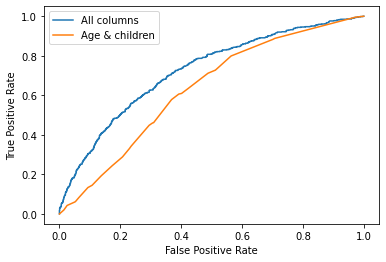

In [39]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [40]:
from sklearn.metrics import roc_curve

In [41]:
from sklearn.metrics import roc_auc_score

In [42]:
roc_auc_score( Y_test, predictions[:, 1] )

0.5141550167462996

In [43]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [44]:
from sklearn.metrics import auc

In [45]:
auc( fpr, tpr )

0.7225943566902437

In [46]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [47]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [48]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [49]:
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [50]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

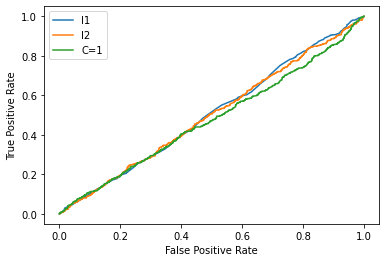

In [51]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [52]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [53]:
Y = data['affair']

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [55]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )

In [56]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [57]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

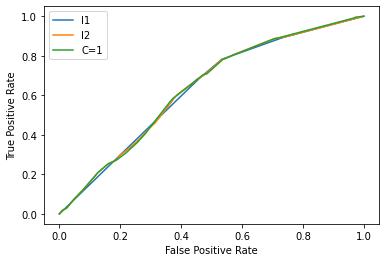

In [58]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()